# EDA

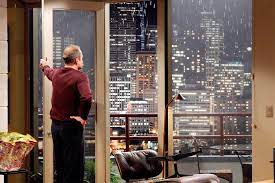

In [1]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## 1. Understanding the Data

Let's start by loading the data and getting a first understanding of what we're working with.

In [2]:
df = pd.read_csv('data/eda.csv')

print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
df.head()


Dataset shape: (21597, 21)

Columns: ['date', 'price', 'id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


,date,price,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.000,7129300520,3.000,1.000,1180.000,5650.000,1.000,NaN,0.000,...,7,1180.000,0.000,1955,0.000,98178,47.511,-122.257,1340.000,5650.000
1,2014-12-09,538000.000,6414100192,3.000,2.250,2570.000,7242.000,2.000,0.000,0.000,...,7,2170.000,400.000,1951,19910.000,98125,47.721,-122.319,1690.000,7639.000
2,2015-02-25,180000.000,5631500400,2.000,1.000,770.000,10000.000,1.000,0.000,0.000,...,6,770.000,0.000,1933,NaN,98028,47.738,-122.233,2720.000,8062.000
3,2014-12-09,604000.000,2487200875,4.000,3.000,1960.000,5000.000,1.000,0.000,0.000,...,7,1050.000,910.000,1965,0.000,98136,47.521,-122.393,1360.000,5000.000
4,2015-02-18,510000.000,1954400510,3.000,2.000,1680.000,8080.000,1.000,0.000,0.000,...,8,1680.000,0.000,1987,0.000,98074,47.617,-122.045,1800.000,7503.000


# Column Names and Descriptions for King County Housing Dataset

This document describes all features (columns) in the King County Housing dataset used for exploratory data analysis.

## Dataset Overview

The dataset contains **21 columns** with information about home sales in King County, Washington, USA. The target variable is `price`, and all other features serve as potential predictors.

## Feature Descriptions

### Identification & Target Variables

- **`id`** (int64)
  - Unique identifier for each house

- **`date`** (object/string)
  - Date when the house was sold

- **`price`** (float64)
  - The sale price of the house in USD

### Property Characteristics

- **`bedrooms`** (float64)
  - Number of bedrooms in the house

- **`bathrooms`** (float64)
  - Number of bathrooms in the house

- **`sqft_living`** (float64)
  - Square footage of interior housing living space

- **`sqft_lot`** (float64)
  - Square footage of the land lot

- **`floors`** (float64)
  - Total number of floors (levels) in the house

- **`sqft_above`** (float64)
  - Square footage of house apart from basement

- **`sqft_basement`** (float64)
  - Square footage of the basement

### Property Quality & Condition

- **`waterfront`** (float64)
  - Binary indicator: House has a view to a waterfront

- **`view`** (float64)
  - Quality of view from the house

- **`condition`** (int64)
  - Overall condition of the house

- **`grade`** (int64)
  - Overall grade given to the housing unit
  - Based on King County grading system
  - Takes into account construction quality, design, and materials
  - Higher grades indicate better quality

### Property Age & History

- **`yr_built`** (int64)
  - Year when the house was originally built

- **`yr_renovated`** (float64)
  - Year when the house was renovated

### Location Information

- **`zipcode`** (int64)
  - ZIP code of the property location

- **`lat`** (float64)
  - Latitude coordinate of the property

- **`long`** (float64)
  - Longitude coordinate of the property

### Neighborhood Context Features

- **`sqft_living15`** (float64)
  - The square footage of interior housing living space for the nearest 15 neighbors
  - Provides context about the typical house size in the immediate neighborhood
  - Useful for understanding how a property compares to its surroundings

- **`sqft_lot15`** (float64)
  - The square footage of the land lots of the nearest 15 neighbors
  - Provides context about the typical lot size in the immediate neighborhood
  - Useful for understanding how a property's lot compares to its surroundings

### Step 1: Check Missing Values

Let's systematically check for missing values in each column.



Total rows in dataset: 21,597
Total columns: 21

Columns with missing values: 4

------------------------------------------------------------
       Column  Missing Count  Percentage
 yr_renovated           3848      17.817
   waterfront           2391      11.071
sqft_basement            452       2.093
         view             63       0.292
------------------------------------------------------------

Visualization of missing values:


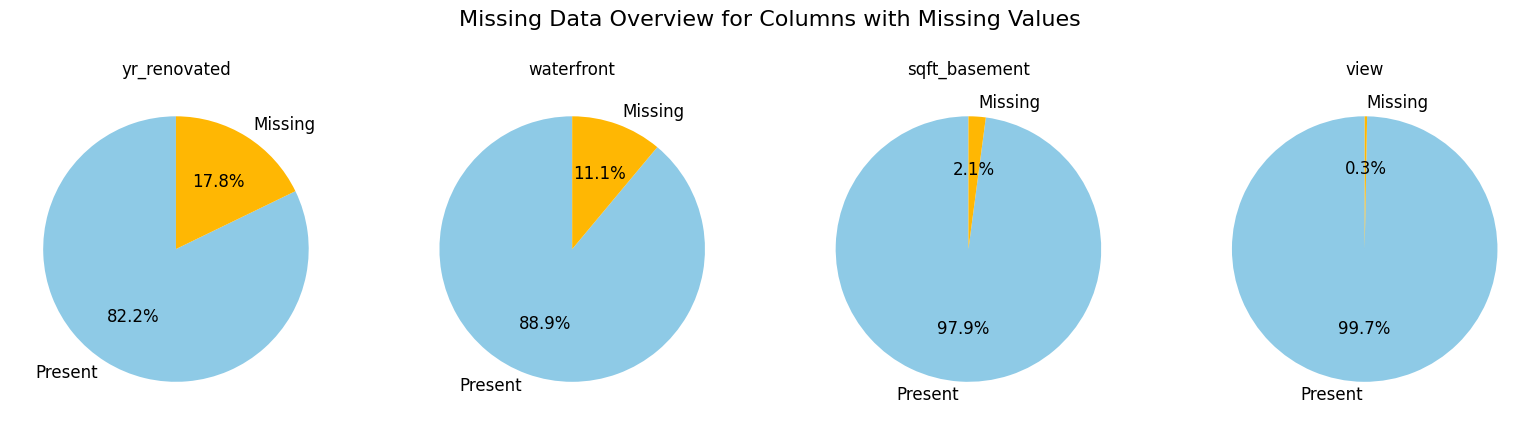

In [3]:
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Count': missing_values.values,
    'Percentage': missing_percent.values
})

missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

print(f"\nTotal rows in dataset: {len(df):,}")
print(f"Total columns: {len(df.columns)}")

if len(missing_df) > 0:
    print(f"\nColumns with missing values: {len(missing_df)}")
    print("\n" + "-" * 60)
    print(missing_df.to_string(index=False))
    print("-" * 60)
    
    print("\nVisualization of missing values:")
    
    # Plot a pie chart for each column with missing values to show missing vs present data
    # Plot all missing value pie charts in a single figure (1 row, n cols)
    n_cols = len(missing_df)
    plt.figure(figsize=(4 * n_cols, 4))
    for i, col in enumerate(missing_df['Column']):
        missing_count = df[col].isna().sum()
        present_count = df.shape[0] - missing_count
        ax = plt.subplot(1, n_cols, i + 1)
        ax.pie(
            [present_count, missing_count],
            labels=['Present', 'Missing'],
            colors=['#8ecae6', '#ffb703'],
            autopct='%1.1f%%',
            startangle=90,
            textprops={'fontsize': 12}
        )
        ax.set_title(col)
    plt.suptitle("Missing Data Overview for Columns with Missing Values", fontsize=16, y=1.05)
    plt.tight_layout()
    plt.show()
else:
    print("\n✓ No missing values found in the dataset!")


#### Interpreting Missing Values

Let's examine what these missing values might mean for each column:

1. **yr_renovated**  
   - **Missing:** 17.8% (3,848 values)  
   - **Likely meaning:** House was *never* renovated.  
   - **Common approach:** Fill with `0` or `'Never renovated'`.  
   - **Check:**  
       - Non-missing values include 0: `17005 times`  
       - Unique non-missing values: `[np.float64(0.0), np.float64(19340.0), np.float64(19400.0), np.float64(19440.0), np.float64(19450.0), np.float64(19460.0), np.float64(19480.0), np.float64(19500.0), np.float64(19510.0), np.float64(19530.0)]`

2. **waterfront**  
   - **Missing:** 11.1% (2,391 values)  
   - **Likely meaning:** The property is *not* waterfront (`binary` feature).  
   - **Common approach:** Fill with `0` (False/No).  
   - **Check:**  
       - Non-missing values: `[np.float64(0.0), np.float64(1.0)]`

3. **sqft_basement**  
   - **Missing:** 2.1% (452 values)  
   - **Likely meaning:** No basement (0 sqft) or unknown.  
   - **Common approach:** Fill with `0` if no basement, or median otherwise.  
   - **Check:**  
       - Non-missing values include 0: `12827 times`  
       - Median (non-missing): `0 sqft`

4. **view**  
   - **Missing:** 0.3% (63 values)  
   - **Likely meaning:** Unknown view quality (very few missing).  
   - **Common approach:** Fill with median/mode, or `0` (no view).  
   - **Check:**  
       - Non-missing values: `[np.float64(0.0), np.float64(1.0), np.float64(2.0), np.float64(3.0), np.float64(4.0)]`  
       - Mode (most common): `0.0`

**Domain Knowledge Considerations:**

1. **yr_renovated**: In real estate, if a house was never renovated, this field is often left blank or set to 0. Since `17.8%` are missing and we see `0` values in the data, missing likely means "never renovated" → **Fill with `0`**

2. **waterfront**: This is a binary feature (`0` = no, `1` = yes). Missing values likely mean "not waterfront" → **Fill with `0`**

3. **sqft_basement**: Missing could mean no basement (`0` sqft). We should check if houses with missing basement have sqft_above = sqft_living (which would indicate no basement) → **Investigate further**

4. **view**: Very few missing (`0.3%`), likely data entry errors. Since `0` is the most common value (no view), missing likely means "no view" → **Fill with `0`**

Let's verify these assumptions by checking relationships between columns.


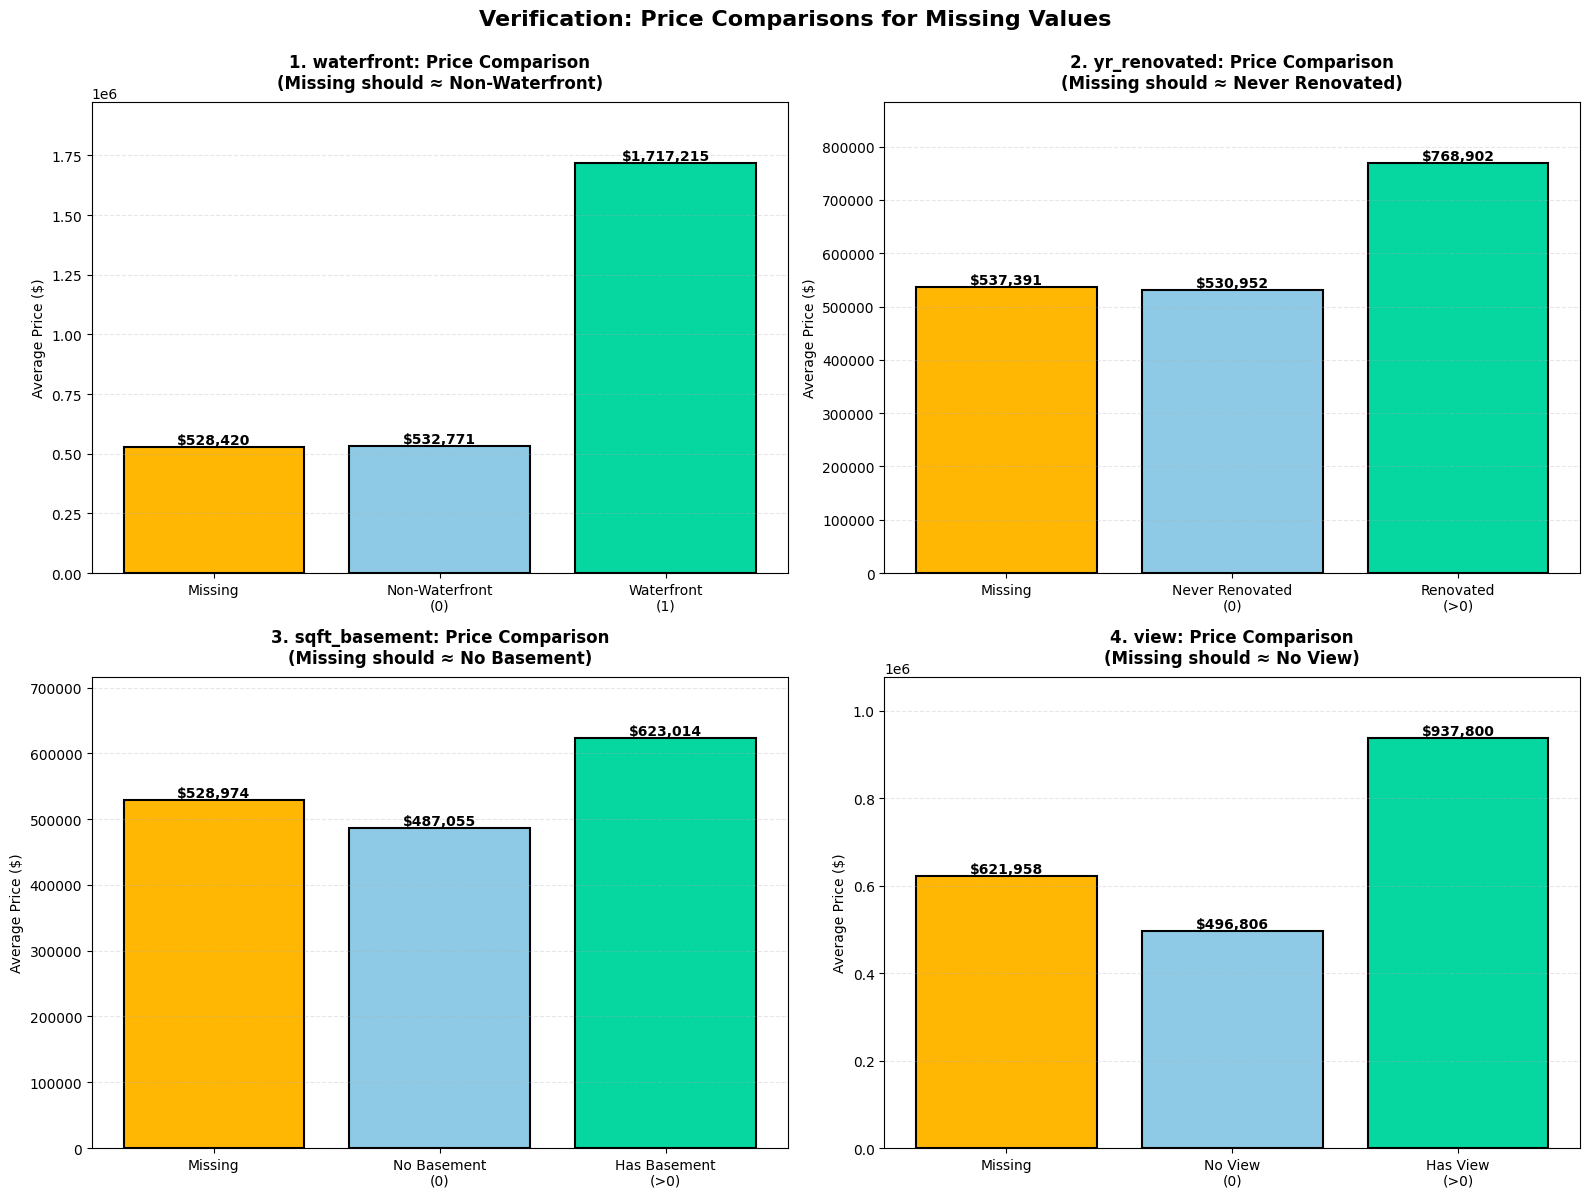

In [4]:
# VERIFICATION CHECKS - Price Comparisons to Verify Missing Value Assumptions
# Comparing prices helps verify if missing values behave similarly to the values we plan to fill them with
from plotting_utils import plot_price_comparison

# Create figure with 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Verification: Price Comparisons for Missing Values', fontsize=16, fontweight='bold', y=0.995)

# Plot all 4 comparisons
plot_price_comparison(
    df, 'waterfront', axes[0, 0],
    '1. waterfront: Price Comparison\n(Missing should ≈ Non-Waterfront)',
    'Non-Waterfront\n(0)', 'Waterfront\n(1)'
)

plot_price_comparison(
    df, 'yr_renovated', axes[0, 1],
    '2. yr_renovated: Price Comparison\n(Missing should ≈ Never Renovated)',
    'Never Renovated\n(0)', 'Renovated\n(>0)'
)

plot_price_comparison(
    df, 'sqft_basement', axes[1, 0],
    '3. sqft_basement: Price Comparison\n(Missing should ≈ No Basement)',
    'No Basement\n(0)', 'Has Basement\n(>0)'
)

plot_price_comparison(
    df, 'view', axes[1, 1],
    '4. view: Price Comparison\n(Missing should ≈ No View)',
    'No View\n(0)', 'Has View\n(>0)'
)

plt.tight_layout()
plt.show()


### Step 2: Decide How to Handle Missing Values

Based on our analysis, let's create a cleaning plan and implement it.

#### Cleaning Plan

Based on domain knowledge and data verification:

| Column | Missing % | Strategy | Reason |
|--------|-----------|----------|--------|
| `yr_renovated` | 17.8% | Fill with `0` | Missing = never renovated (common in real estate) |
| `waterfront` | 11.1% | Fill with `0` | Missing = not waterfront (binary feature) |
| `sqft_basement` | 2.1% | Fill with `0` | Missing = no basement (verified by sqft_above = sqft_living) |
| `view` | 0.3% | Fill with `0` | Missing = no view (mode value, very few missing) |

**Note:** We'll create a cleaned copy of the dataframe to preserve the original data.


In [5]:
df_clean = df.copy()

print("BEFORE CLEANING:")
print(f"Total missing values: {df_clean.isnull().sum().sum()}")
print(f"Missing by column:")
print(df_clean.isnull().sum()[df_clean.isnull().sum() > 0])

print("\n" + "=" * 60)
print("APPLYING CLEANING STRATEGY")
print("=" * 60)

df_clean['yr_renovated'] = df_clean['yr_renovated'].fillna(0)
print("✓ Filled yr_renovated missing values with 0")

df_clean['waterfront'] = df_clean['waterfront'].fillna(0)
print("✓ Filled waterfront missing values with 0")

df_clean['sqft_basement'] = df_clean['sqft_basement'].fillna(0)
print("✓ Filled sqft_basement missing values with 0")

df_clean['view'] = df_clean['view'].fillna(0)
print("✓ Filled view missing values with 0")

print("\n" + "=" * 60)
print("AFTER CLEANING:")
print("=" * 60)
remaining_missing = df_clean.isnull().sum().sum()
print(f"Total missing values: {remaining_missing}")

if remaining_missing == 0:
    print("✓ All missing values have been handled!")
else:
    print(f"⚠ Warning: {remaining_missing} missing values still remain")
    print(df_clean.isnull().sum()[df_clean.isnull().sum() > 0])


BEFORE CLEANING:
Total missing values: 6754
Missing by column:
waterfront       2391
view               63
sqft_basement     452
yr_renovated     3848
dtype: int64

APPLYING CLEANING STRATEGY
✓ Filled yr_renovated missing values with 0
✓ Filled waterfront missing values with 0
✓ Filled sqft_basement missing values with 0
✓ Filled view missing values with 0

AFTER CLEANING:
Total missing values: 0
✓ All missing values have been handled!


### Step 3: Convert Data Types Appropriately

Let's check the current data types and convert them to the appropriate types for analysis.


In [6]:
print("CURRENT DATA TYPES:")
print("=" * 60)
print(df_clean.dtypes)
print("\n" + "=" * 60)
print("DATA TYPE SUMMARY:")
print("=" * 60)

print(f"\nObject (string) columns: {df_clean.select_dtypes(include=['object']).columns.tolist()}")
print(f"\nNumeric columns: {df_clean.select_dtypes(include=[np.number]).columns.tolist()}")
print(f"\nFloat columns: {df_clean.select_dtypes(include=['float64']).columns.tolist()}")
print(f"\nInteger columns: {df_clean.select_dtypes(include=['int64']).columns.tolist()}")


CURRENT DATA TYPES:
date              object
price            float64
id                 int64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above       float64
sqft_basement    float64
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
dtype: object

DATA TYPE SUMMARY:

Object (string) columns: ['date']

Numeric columns: ['price', 'id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

Float columns: ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'sqft_above', 'sqft_

#### Data Type Conversion Plan

1. **`date`** → Convert to `datetime` (currently object/string)
2. **Integer columns** → Convert float columns that should be integers (e.g., `bedrooms`, `floors`, `condition`, `grade`, `yr_built`, `yr_renovated`, `zipcode`)
3. **Categorical columns** → Consider converting to category type for memory efficiency (e.g., `waterfront`, `view`, `condition`, `grade`, `zipcode`)
4. **Boolean columns** → `waterfront` could be boolean, but keeping as int (0/1) is fine for analysis

Let's implement these conversions:


In [7]:
print("CONVERTING DATA TYPES")
print("=" * 60)

print("\n1. Converting 'date' to datetime...")
df_clean['date'] = pd.to_datetime(df_clean['date'])
print(f"   ✓ Date column converted to datetime")
print(f"   Date range: {df_clean['date'].min()} to {df_clean['date'].max()}")

print("\n2. Converting float columns to integers where appropriate...")
integer_columns = ['bedrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 
                   'yr_built', 'yr_renovated', 'zipcode']

for col in integer_columns:
    if col in df_clean.columns:
        if df_clean[col].dtype == 'float64':
            df_clean[col] = df_clean[col].astype('int64')
            print(f"   ✓ {col}: float64 → int64")
        elif df_clean[col].dtype == 'object':
            df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce').astype('int64')
            print(f"   ✓ {col}: object → int64")

print("\n3. Summary of conversions:")
print(f"   Date column type: {df_clean['date'].dtype}")
print(f"   Integer columns: {df_clean[integer_columns].dtypes.to_dict()}")


CONVERTING DATA TYPES

1. Converting 'date' to datetime...
   ✓ Date column converted to datetime
   Date range: 2014-05-02 00:00:00 to 2015-05-27 00:00:00

2. Converting float columns to integers where appropriate...
   ✓ bedrooms: float64 → int64
   ✓ floors: float64 → int64
   ✓ waterfront: float64 → int64
   ✓ view: float64 → int64
   ✓ yr_renovated: float64 → int64

3. Summary of conversions:
   Date column type: datetime64[ns]
   Integer columns: {'bedrooms': dtype('int64'), 'floors': dtype('int64'), 'waterfront': dtype('int64'), 'view': dtype('int64'), 'condition': dtype('int64'), 'grade': dtype('int64'), 'yr_built': dtype('int64'), 'yr_renovated': dtype('int64'), 'zipcode': dtype('int64')}


In [8]:
print("VERIFICATION: Final Data Types")
print("=" * 60)
print("\nAll data types:")
print(df_clean.dtypes)

print("\n" + "=" * 60)
print("Sample of converted columns:")
print("=" * 60)
print(f"\nDate column (first 5):")
print(df_clean['date'].head())
print(f"\nDate column info:")
print(f"  Type: {df_clean['date'].dtype}")
print(f"  Range: {df_clean['date'].min()} to {df_clean['date'].max()}")

print(f"\nInteger columns sample:")
print(df_clean[['bedrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']].head())
print(f"\nInteger columns dtypes:")
print(df_clean[['bedrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']].dtypes)


VERIFICATION: Final Data Types

All data types:
date             datetime64[ns]
price                   float64
id                        int64
bedrooms                  int64
bathrooms               float64
sqft_living             float64
sqft_lot                float64
floors                    int64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above              float64
sqft_basement           float64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15           float64
sqft_lot15              float64
dtype: object

Sample of converted columns:

Date column (first 5):
0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]

Date column info:
  Type: datetime64[ns]
  Range: 2014-05-02 00:00:00 to 2015-05-27 00:00:00

Integer 

**Summary:** 
- ✓ `date` column converted to datetime for time-based analysis
- ✓ Integer columns converted from float to int (removes unnecessary decimal places)
- ✓ Data types are now optimized for analysis

### Step 4: Check for Outliers and Decide How to Handle Them

Outliers can significantly impact our analysis. Let's identify them using statistical methods and visualizations.


#### Outlier Detection Methods

We'll use the **IQR (Interquartile Range) method** to identify outliers:
- **IQR = Q3 - Q1** (75th percentile - 25th percentile)
- **Lower bound = Q1 - 1.5 × IQR**
- **Upper bound = Q3 + 1.5 × IQR**
- Values outside these bounds are considered outliers


In [9]:
from data_utils import detect_outliers_iqr

key_numeric_columns = ['price', 'sqft_living', 'sqft_lot', 'bedrooms', 'bathrooms', 'sqft_above', 'sqft_basement', 
                       'sqft_living15', 'sqft_lot15', 'floors']

outlier_summary = []
for col in key_numeric_columns:
    if col in df_clean.columns:
        outlier_info = detect_outliers_iqr(df_clean, col)
        outlier_summary.append(outlier_info)

outlier_df = pd.DataFrame(outlier_summary)

print("OUTLIER DETECTION SUMMARY (IQR Method)")
print("=" * 80)
print(outlier_df.to_string(index=False))


OUTLIER DETECTION SUMMARY (IQR Method)
       column         Q1         Q3        IQR  lower_bound  upper_bound  outlier_count  outlier_percentage  min_value   max_value
        price 322000.000 645000.000 323000.000  -162500.000  1129500.000           1158               5.362  78000.000 7700000.000
  sqft_living   1430.000   2550.000   1120.000     -250.000     4230.000            571               2.644    370.000   13540.000
     sqft_lot   5040.000  10685.000   5645.000    -3427.500    19152.500           2419              11.201    520.000 1651359.000
     bedrooms      3.000      4.000      1.000        1.500        5.500            530               2.454      1.000      33.000
    bathrooms      1.750      2.500      0.750        0.625        3.625            561               2.598      0.500       8.000
   sqft_above   1190.000   2210.000   1020.000     -340.000     3740.000            610               2.824    370.000    9410.000
sqft_basement      0.000    550.000    550.0

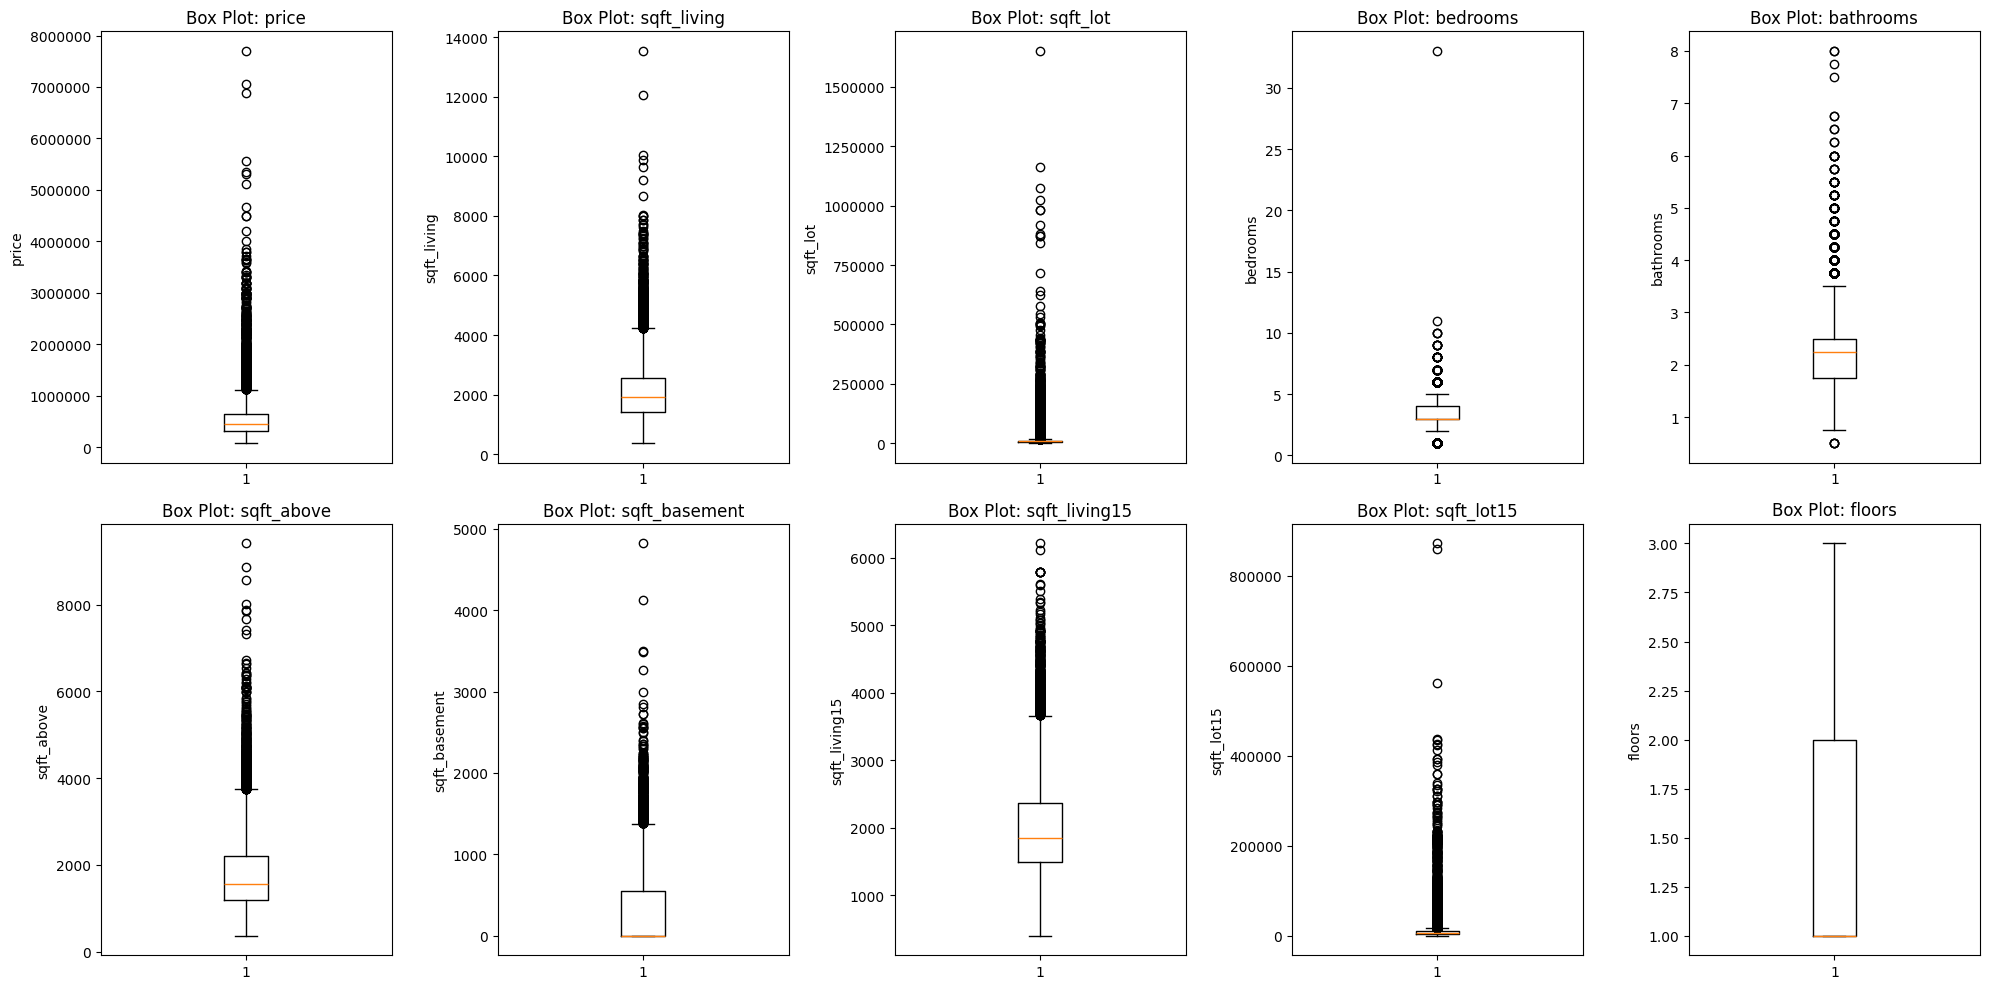

In [10]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(key_numeric_columns):
    if col in df_clean.columns:
        axes[i].boxplot(df_clean[col], vert=True)
        axes[i].set_title(f'Box Plot: {col}')
        axes[i].set_ylabel(col)
        axes[i].ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()


#### Detailed Analysis: Price Outliers

Price is our target variable, so let's examine outliers more closely.


In [11]:
price_info = detect_outliers_iqr(df_clean, 'price')

print(f"Q1 (25th percentile): ${price_info['Q1']:,.2f}")
print(f"Q3 (75th percentile): ${price_info['Q3']:,.2f}")
print(f"IQR: ${price_info['IQR']:,.2f}")
print(f"\nLower bound: ${price_info['lower_bound']:,.2f}")
print(f"Upper bound: ${price_info['upper_bound']:,.2f}")
print(f"\nMinimum price: ${price_info['min_value']:,.2f}")
print(f"Maximum price: ${price_info['max_value']:,.2f}")
print(f"\nOutliers detected: {price_info['outlier_count']:,} ({price_info['outlier_percentage']:.2f}%)")

price_outliers = df_clean[(df_clean['price'] < price_info['lower_bound']) | 
                          (df_clean['price'] > price_info['upper_bound'])]

print("\nOutlier price range:")
print(f"  Lowest outlier: ${price_outliers['price'].min():,.2f}")
print(f"  Highest outlier: ${price_outliers['price'].max():,.2f}")

print("\nSample of high-price outliers (top 10):")
print(price_outliers.nlargest(10, 'price')[['price', 'sqft_living', 'bedrooms', 'bathrooms', 'grade', 'waterfront']])


Q1 (25th percentile): $322,000.00
Q3 (75th percentile): $645,000.00
IQR: $323,000.00

Lower bound: $-162,500.00
Upper bound: $1,129,500.00

Minimum price: $78,000.00
Maximum price: $7,700,000.00

Outliers detected: 1,158 (5.36%)

Outlier price range:
  Lowest outlier: $1,130,000.00
  Highest outlier: $7,700,000.00

Sample of high-price outliers (top 10):
           price  sqft_living  bedrooms  bathrooms  grade  waterfront
7245 7700000.000    12050.000         6      8.000     13           0
3910 7060000.000    10040.000         5      4.500     11           1
9245 6890000.000     9890.000         6      7.750     13           0
4407 5570000.000     9200.000         5      5.750     13           0
1446 5350000.000     8000.000         5      5.000     12           0
1313 5300000.000     7390.000         6      6.000     12           1
1162 5110000.000     8010.000         5      5.250     12           1
8085 4670000.000     9640.000         5      6.750     12           1
2624 4500000.

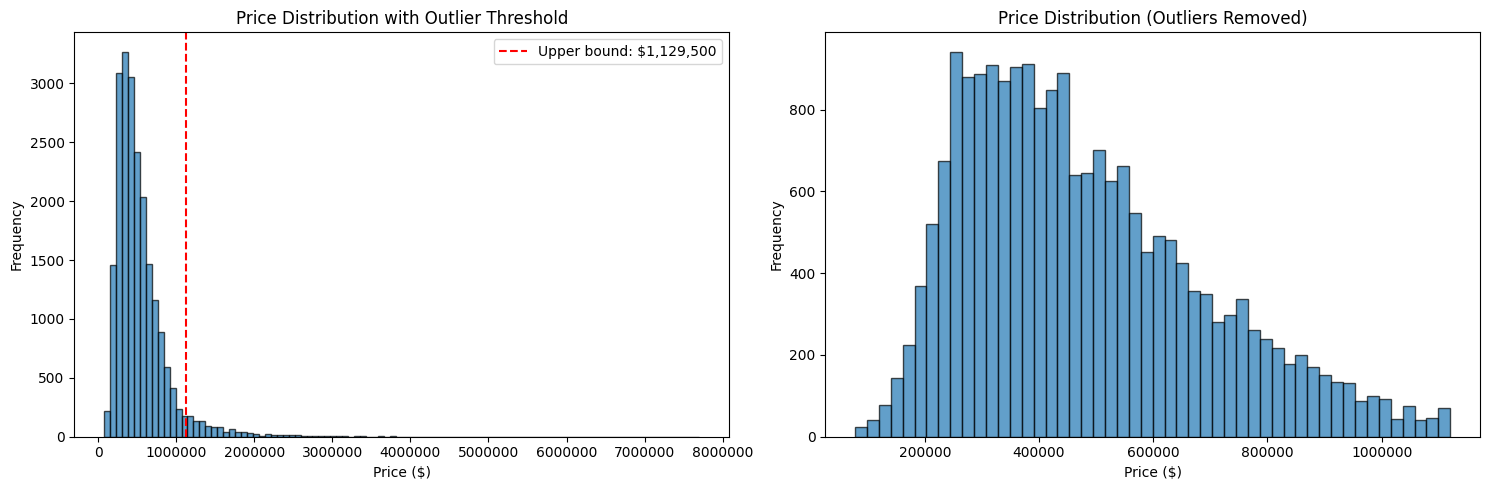

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].hist(df_clean['price'], bins=100, edgecolor='black', alpha=0.7)
axes[0].axvline(price_info['upper_bound'], color='red', linestyle='--', label=f'Upper bound: ${price_info["upper_bound"]:,.0f}')
axes[0].set_title('Price Distribution with Outlier Threshold')
axes[0].set_xlabel('Price ($)')
axes[0].set_ylabel('Frequency')
axes[0].legend()
axes[0].ticklabel_format(style='plain', axis='x')

axes[1].hist(df_clean[df_clean['price'] <= price_info['upper_bound']]['price'], bins=50, edgecolor='black', alpha=0.7)
axes[1].set_title('Price Distribution (Outliers Removed)')
axes[1].set_xlabel('Price ($)')
axes[1].set_ylabel('Frequency')
axes[1].ticklabel_format(style='plain', axis='x')

plt.tight_layout()
plt.show()


#### How to Handle Outliers

**Considerations:**
1. **Price outliers**: High prices might be legitimate (luxury homes, waterfront properties). Removing them could remove important market segments.
2. **sqft_lot outliers**: Very large lots might be legitimate (rural properties, estates).
3. **Bedrooms/Bathrooms**: Extreme values might be data errors (e.g., 33 bedrooms).

**Strategy:**
- **Keep outliers** for most analysis (they represent real market diversity)
- **Document** outlier counts and percentages
- **Consider** separate analysis for luxury vs. standard homes
- **Remove** only if clearly data errors (e.g., impossible values)

**For this EDA:** We'll keep all outliers but be aware of them in our analysis. If needed, we can create filtered versions later.

**Summary of Data Cleaning:**
- **Step 1**: Identified 4 columns with missing values (17.8% max)  
- **Step 2**: Filled all missing values with appropriate defaults (0)  
- **Step 3**: Converted data types (date → datetime, floats → integers)  
- **Step 4**: Identified outliers but decided to keep them for analysis  

We'll use `df_clean` for all subsequent analysis.

### Geographical Analysis

Creating an interactive map to visualize house locations and prices across King County. This will help us identify geographical patterns and support our required geographical insight.


In [13]:
import folium

# Create a map of the house locations
center_lat = df_clean['lat'].mean()
center_lon = df_clean['long'].mean()

# Create the map
m = folium.Map(location=[center_lat, center_lon], zoom_start=10)

# Sample a subset of the data for plotting
sample_size = 1000
df_sample = df_clean.sample(n=min(sample_size, len(df_clean)), random_state=42)

# Define a function to color code the houses by price
price_min = df_clean['price'].min()
price_max = df_clean['price'].max()

def get_color(price):
    """Color code by price: green (low) to red (high)"""
    normalized = (price - price_min) / (price_max - price_min)
    if normalized < 0.33:
        return 'green'
    elif normalized < 0.66:
        return 'orange'
    else:
        return 'red'

# Add markers to the map
for idx, row in df_sample.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['long']],
        radius=3,
        popup=f"Price: ${row['price']:,.0f}<br>"
              f"Sqft: {row['sqft_living']:,.0f}<br>"
              f"Bedrooms: {row['bedrooms']}<br>"
              f"Zipcode: {row['zipcode']}",
        color=get_color(row['price']),
        fill=True,
        fillOpacity=0.6
    ).add_to(m)

print(f"✓ Added {len(df_sample):,} markers to map")

# Display the map
m


✓ Added 1,000 markers to map


## 2. Research Questions and Hypothesis Generation

Before diving deeper into the analysis, let's formulate research questions and hypotheses.

### Client Selection: Erin Robinson

**Client Profile:**
- **Type:** Buyer
- **Goal:** Invest in poor neighborhoods, buying & selling
- **Strategy:** Costs back + little profit (5-15% margin)
- **Values:** Socially responsible investment

**Key Questions for Erin:**
1. Which neighborhoods/zipcodes have the lowest average prices?
2. What properties offer the best value for renovation potential?
3. What is the profit margin potential after renovation costs?
4. Which areas have the most social impact potential?

**Assumptions:**
- "Poor neighborhood" = zipcodes in the bottom 25th percentile of average prices
- "Little profit" = 5-15% profit margin after costs
- Social responsibility = investing in areas that need housing improvement

### Three Hypothesis

1. **Geographical Hypothesis:** The cheapest zipcodes (bottom 25% by average price) have more unrenovated houses than expensive zipcodes.
2. **Renovation Value Hypothesis:** Unrenovated houses (yr_renovated = 0) in affordable zipcodes are cheaper per square foot than renovated houses in the same areas.
3. **Profit Margin Hypothesis:** Smaller houses (under 2000 sqft) in affordable zipcodes offer better profit margins (5-15%) than larger houses when buying and selling.


## 3. Exploring the Data

Let's explore the distributions of our variables and look for patterns interesting insights.


### Distributions of Continuous Variables

Let's examine the distributions of key continuous variables.


Plotting distributions for 11 numeric variables (without outliers):
Variables: ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_built', 'sqft_living15', 'sqft_lot15']



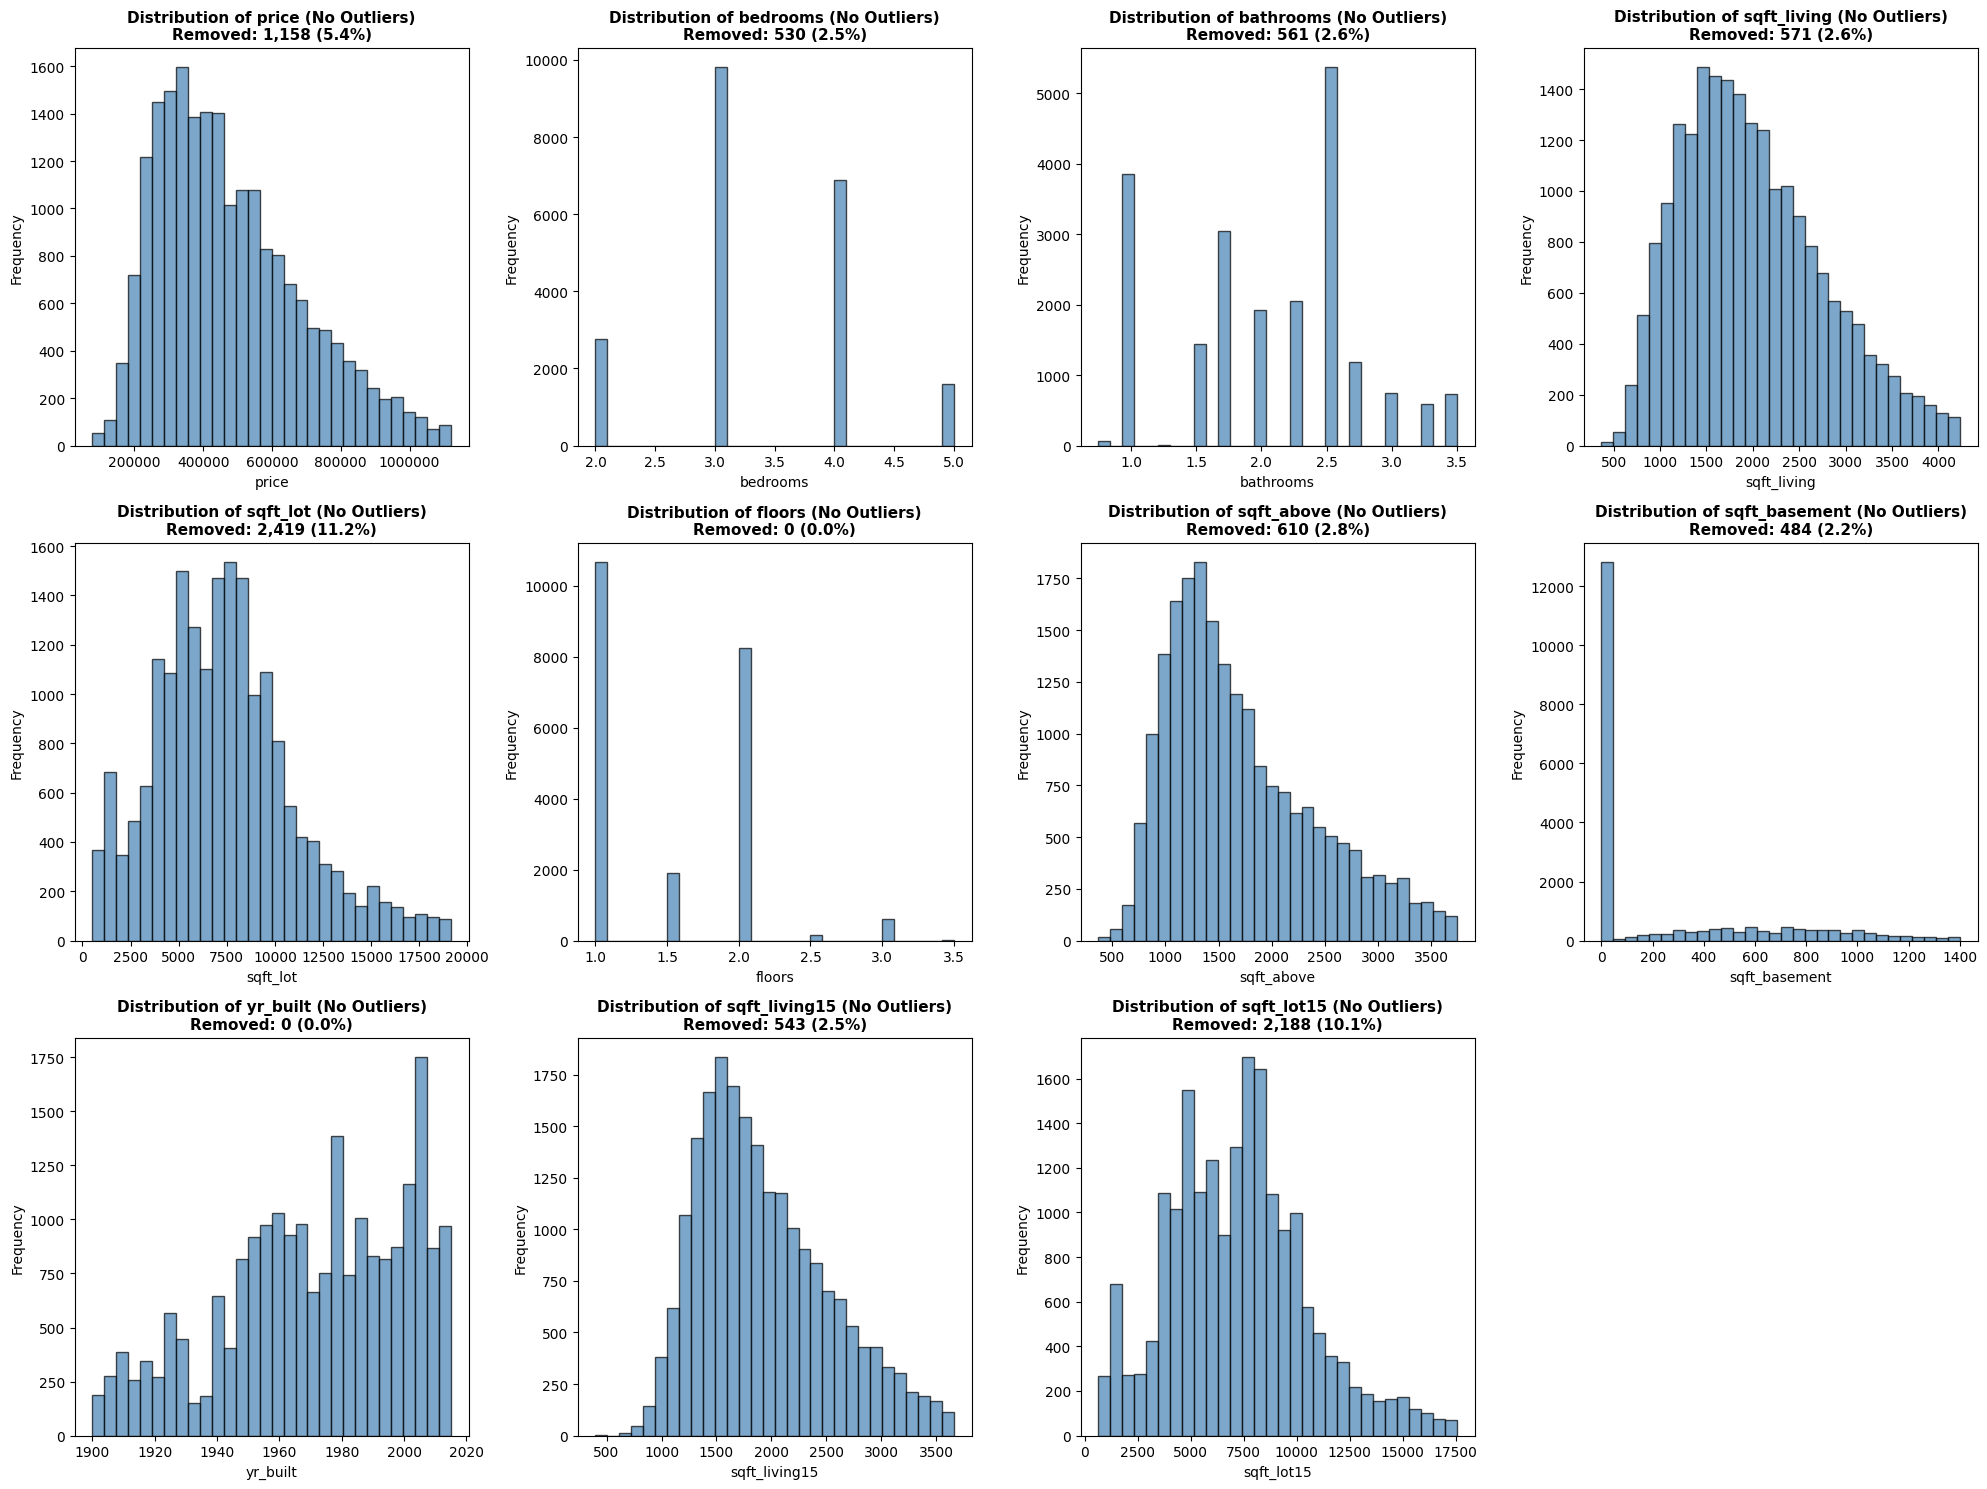

In [14]:
from data_utils import detect_outliers_iqr

# Get all continuous variables
# Select all numeric columns (excluding id and zipcode which are identifiers)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
# Remove numeric columns that are not continuous variables
key_vars = [col for col in numeric_cols if col not in ['id', 'zipcode', 'yr_renovated', 'long', 'lat', 'waterfront', 'view', 'condition', 'grade']]

# Sort to put price first (target variable)
if 'price' in key_vars:
    key_vars.remove('price')
    key_vars.insert(0, 'price')

print(f"Plotting distributions for {len(key_vars)} numeric variables (without outliers):")
print(f"Variables: {key_vars}\n")

# Calculate grid size: enough rows and columns for all variables
n_vars = len(key_vars)
n_cols = 4
n_rows = (n_vars + n_cols - 1) // n_cols  # Ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten()

for i, var in enumerate(key_vars):
    if var in df.columns:
        # Detect outliers using IQR method
        outlier_info = detect_outliers_iqr(df, var)
        
        # Filter out outliers
        df_no_outliers = df[
            (df[var] >= outlier_info['lower_bound']) & 
            (df[var] <= outlier_info['upper_bound'])
        ]
        
        # Plot histogram without outliers
        axes[i].hist(df_no_outliers[var].dropna(), bins=30, edgecolor='black', alpha=0.7, color='steelblue')
        axes[i].set_title(f'Distribution of {var} (No Outliers)\n'
                         f'Removed: {outlier_info["outlier_count"]:,} ({outlier_info["outlier_percentage"]:.1f}%)',
                         fontsize=11, fontweight='bold')
        axes[i].set_xlabel(var)
        axes[i].set_ylabel('Frequency')
        
        # Format x-axis for price (currency)
        if var == 'price':
            axes[i].ticklabel_format(style='plain', axis='x')

# Hide unused subplots
for i in range(len(key_vars), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

### Categorical Variables

Let's examine the distributions of categorical variables.


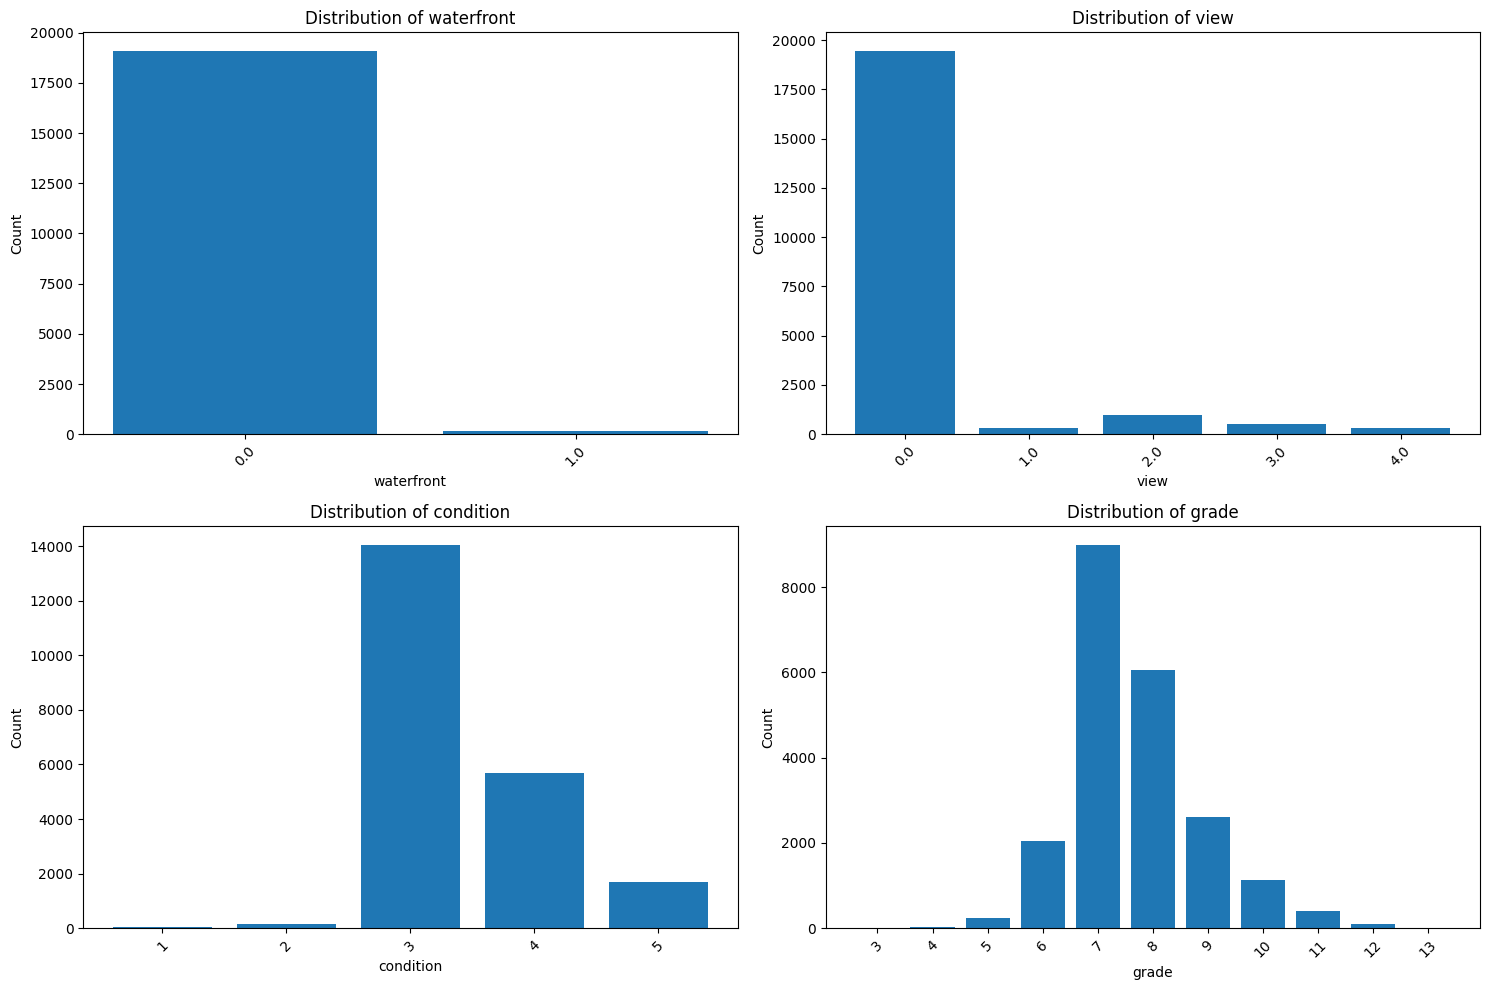

In [15]:
categorical_to_check = ['waterfront', 'view', 'condition', 'grade']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, var in enumerate(categorical_to_check):
    if var in df.columns:
        value_counts = df[var].value_counts().sort_index()
        axes[i].bar(value_counts.index.astype(str), value_counts.values)
        axes[i].set_title(f'Distribution of {var}')
        axes[i].set_xlabel(var)
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


### Correlation Matrix

Let's compute and visualize the correlation matrix to understand relationships between numerical variables.


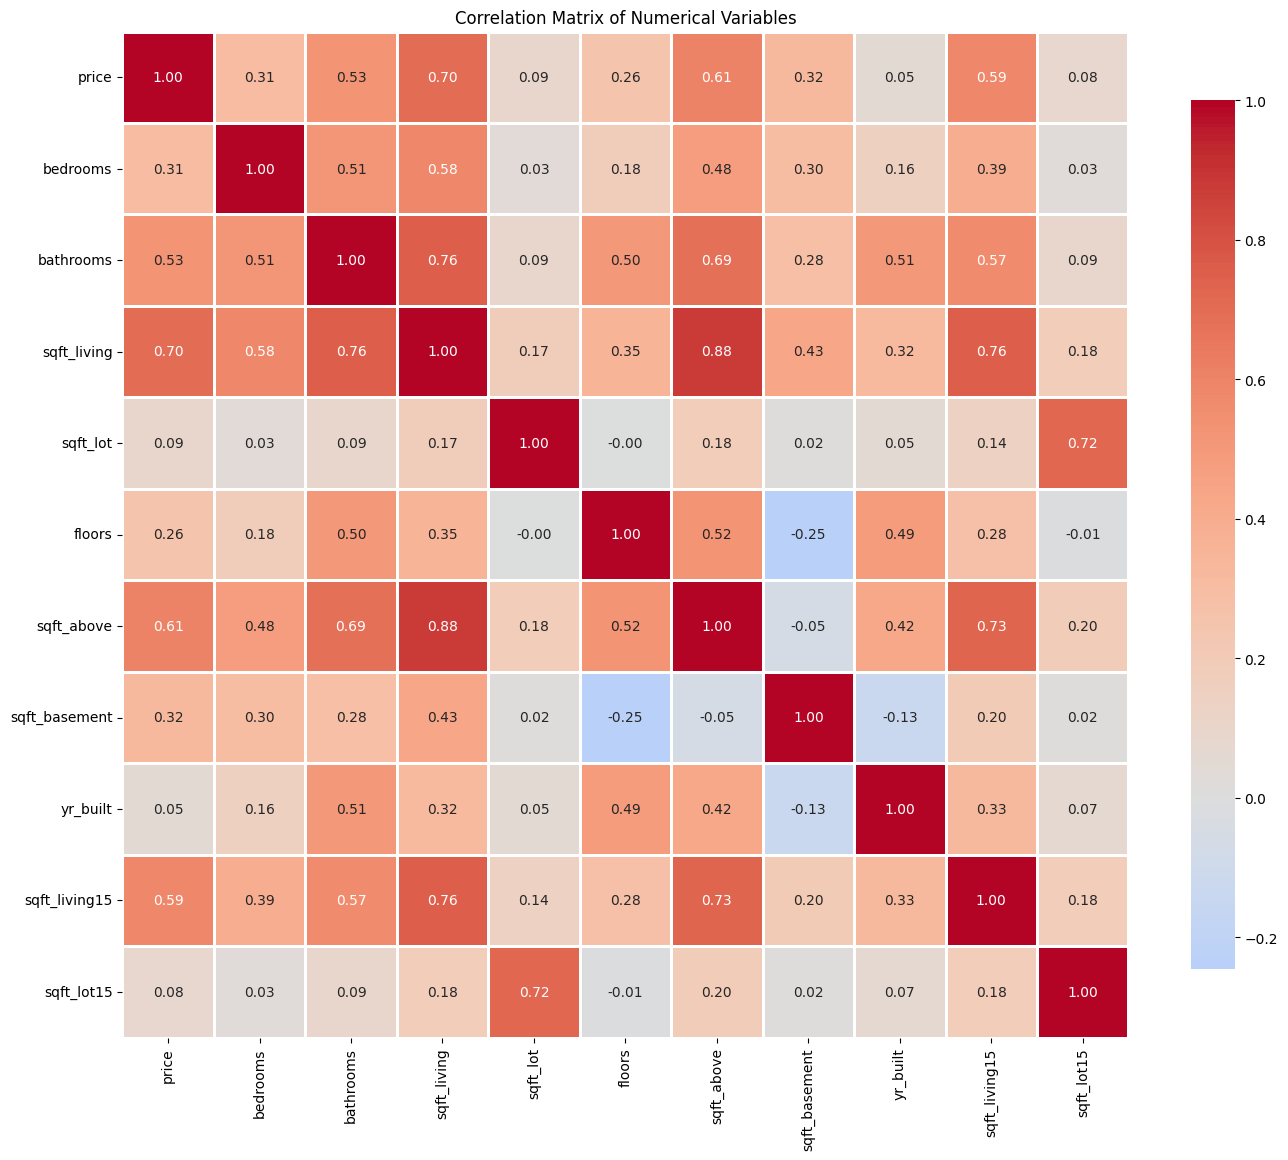


Correlations with Price:
price           1.000
sqft_living     0.702
sqft_above      0.605
sqft_living15   0.585
bathrooms       0.526
sqft_basement   0.325
bedrooms        0.309
floors          0.257
sqft_lot        0.090
sqft_lot15      0.083
yr_built        0.054
Name: price, dtype: float64


In [16]:
cols_to_remove = ['id', 'zipcode', 'yr_renovated', 'long', 'lat', 'waterfront', 'view', 'condition', 'grade']
numeric_df = df.select_dtypes(include=[np.number]).drop(columns=cols_to_remove, errors='ignore')
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()
plt.show()

price_corr = correlation_matrix['price'].sort_values(ascending=False)
print("\nCorrelations with Price:")
print(price_corr)


## 4. Answering Research Questions

Now let's answer the four key questions for Erin Robinson.

### Question 1: Which neighborhoods/zipcodes have the lowest average prices?


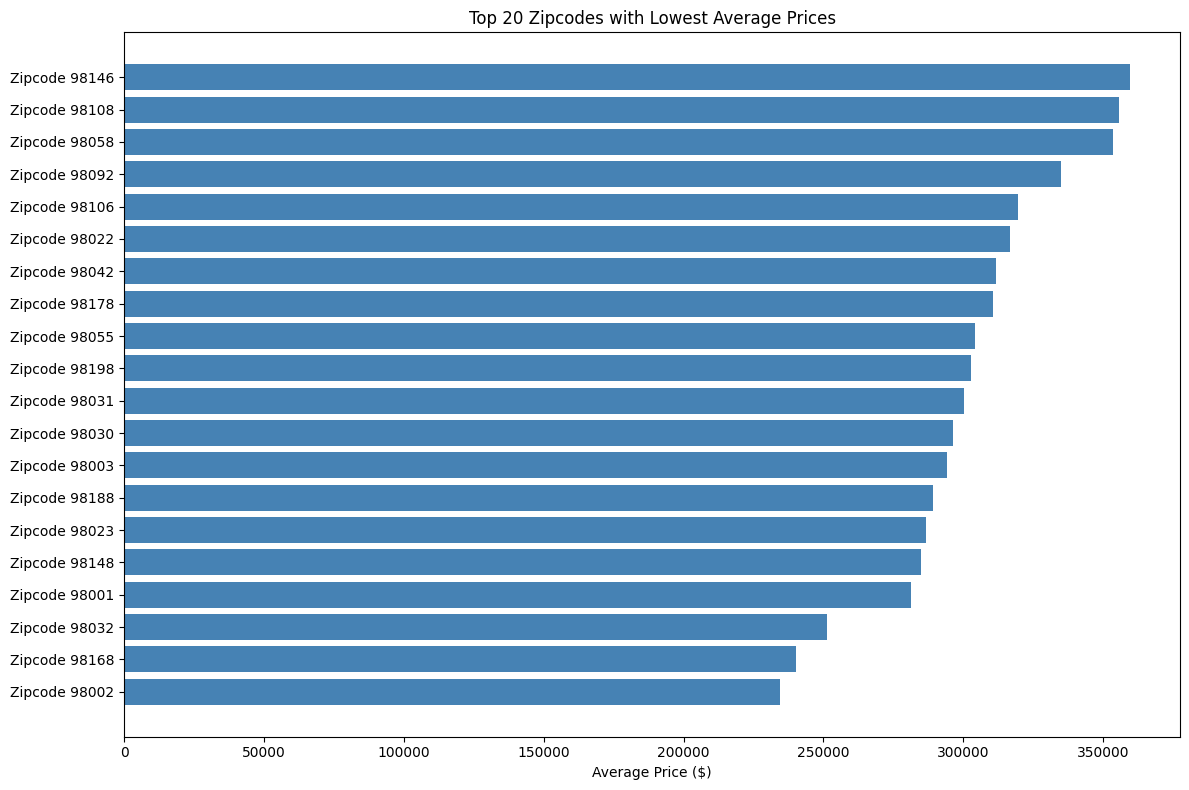

In [17]:
# Calculate average prices by zipcode
zipcode_stats = df_clean.groupby('zipcode')['price'].mean().sort_values()
affordable_zipcode_list = zipcode_stats.head(int(len(zipcode_stats) * 0.25)).index.tolist()

# Visualize
fig, ax = plt.subplots(figsize=(12, 8))
top_20 = zipcode_stats.head(20)
ax.barh(range(len(top_20)), top_20.values, color='steelblue')
ax.set_yticks(range(len(top_20)))
ax.set_yticklabels([f"Zipcode {idx}" for idx in top_20.index])
ax.set_xlabel('Average Price ($)')
ax.set_title('Top 20 Zipcodes with Lowest Average Prices')
ax.ticklabel_format(style='plain', axis='x')
plt.tight_layout()
plt.show()


### Question 2: What properties offer the best value for renovation potential?


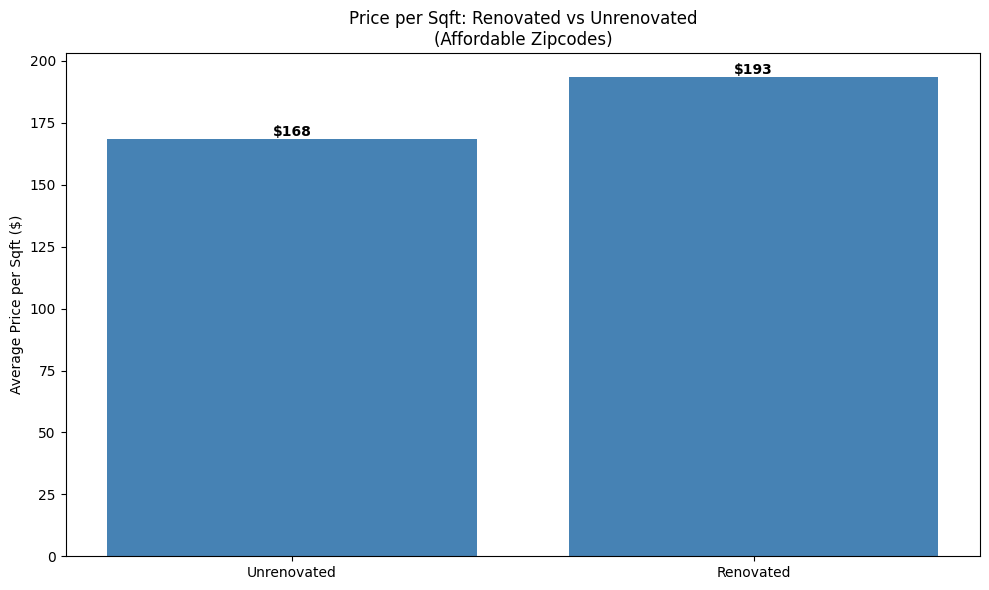

In [18]:
# Focus on affordable zipcodes
affordable_properties = df_clean[df_clean['zipcode'].isin(affordable_zipcode_list)].copy()
affordable_properties['price_per_sqft'] = affordable_properties['price'] / affordable_properties['sqft_living']

# Compare renovated vs unrenovated
renovated = affordable_properties[affordable_properties['yr_renovated'] > 0]
unrenovated = affordable_properties[affordable_properties['yr_renovated'] == 0]

# Visualize comparison
fig, ax = plt.subplots(figsize=(10, 6))
categories = ['Unrenovated', 'Renovated']
prices_per_sqft = [unrenovated['price_per_sqft'].mean(), renovated['price_per_sqft'].mean()]
ax.bar(categories, prices_per_sqft, color='steelblue')
ax.set_ylabel('Average Price per Sqft ($)')
ax.set_title('Price per Sqft: Renovated vs Unrenovated\n(Affordable Zipcodes)')
for i, val in enumerate(prices_per_sqft):
    ax.text(i, val, f'${val:.0f}', ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.show()


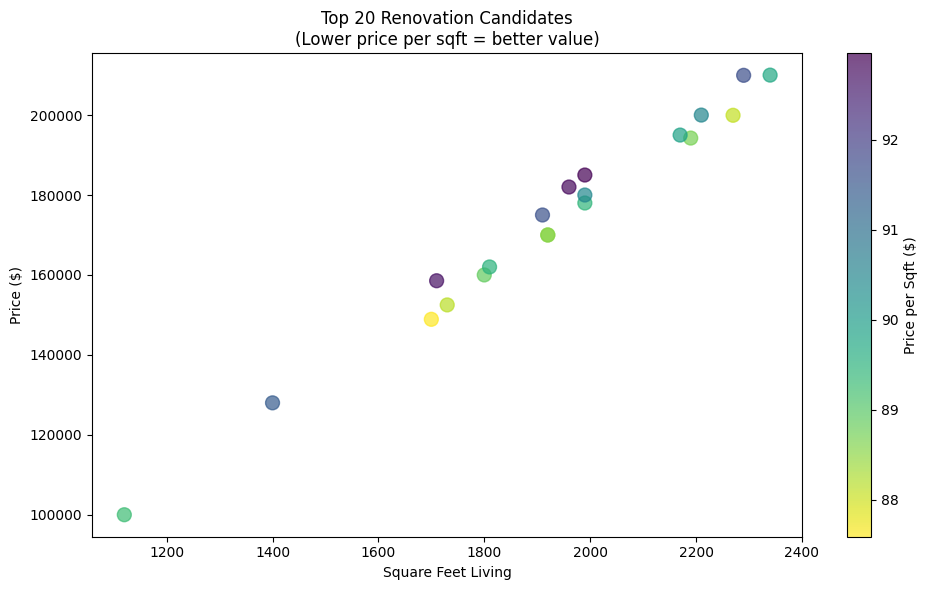

In [19]:
# Find best renovation candidates: unrenovated, condition ≥3, 1000-2500 sqft
renovation_candidates = unrenovated[
    (unrenovated['condition'] >= 3) &
    (unrenovated['sqft_living'] >= 1000) &
    (unrenovated['sqft_living'] <= 2500)
].copy()

# Visualize top candidates
fig, ax = plt.subplots(figsize=(10, 6))
top_20 = renovation_candidates.nsmallest(20, 'price_per_sqft')
ax.scatter(top_20['sqft_living'], top_20['price'], 
          c=top_20['price_per_sqft'], cmap='viridis_r', s=100, alpha=0.7)
ax.set_xlabel('Square Feet Living')
ax.set_ylabel('Price ($)')
ax.set_title('Top 20 Renovation Candidates\n(Lower price per sqft = better value)')
plt.colorbar(ax.collections[0], label='Price per Sqft ($)')
plt.tight_layout()
plt.show()


### Interpreting the Top 20 Renovation Candidates

This scatter plot visualizes the **top 20 renovation candidates** based on the lowest price per square foot in affordable zipcodes. These properties represent the best value opportunities for Erin Robinson's renovation strategy.

**What the graph shows:**
- **X-axis**: Square feet of living space (1000-2500 sqft range)
- **Y-axis**: Purchase price in dollars
- **Color intensity**: Price per square foot (darker colors = lower price per sqft = better value)
- **Each point**: Represents one property that meets the criteria:
  - Located in affordable zipcodes (bottom 25% by average price)
  - Unrenovated (yr_renovated = 0)
  - Condition ≥ 3 (acceptable condition)
  - Size between 1000-2500 sqft (manageable renovation scope)

**Key Insights:**

1. **Lower price per sqft = Better value**: Properties with darker colors (lower price per sqft) offer better value because you're paying less per square foot, leaving more room for renovation costs while maintaining profitability.

2. **Size vs. Price relationship**: The scatter plot helps identify properties where the price-to-size ratio is favorable. Properties that fall below the general trend line offer better value.

3. **Renovation potential**: These candidates are selected because they:
   - Are in affordable neighborhoods (lower purchase prices)
   - Haven't been renovated yet (room for improvement)
   - Are in acceptable condition (not requiring major structural work)
   - Are in a manageable size range (not too small to be profitable, not too large to be expensive)

**What to look for:**
- **Properties in the lower-left area**: Lower price AND smaller size = lower total investment
- **Darker colored points**: Lower price per sqft = better value proposition
- **Properties that balance**: Moderate size (1500-2000 sqft) with low price per sqft often offer the best renovation opportunities


### Question 3: What is the profit margin potential after renovation costs?


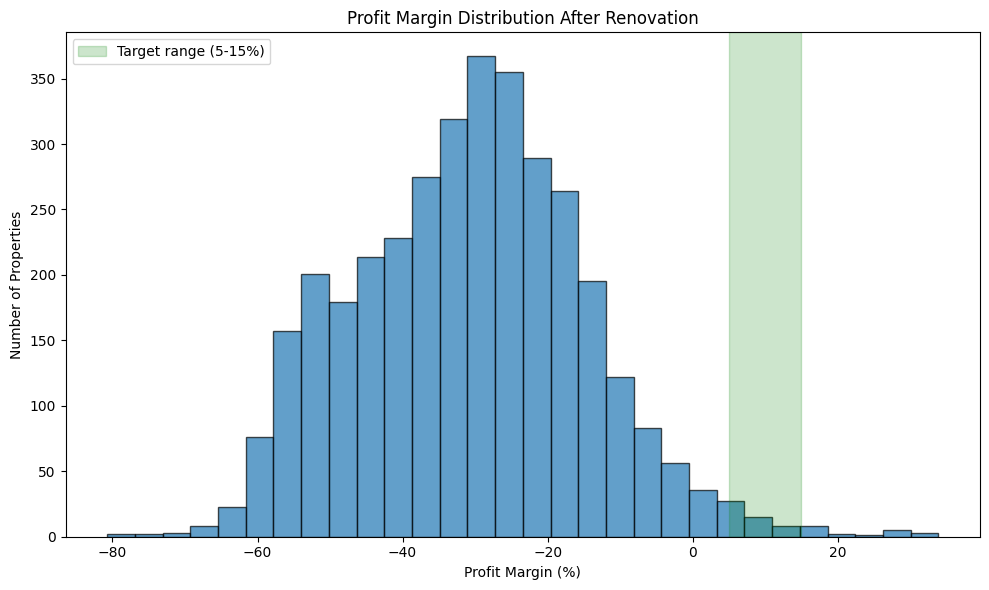

In [20]:
# Calculate profit margins after renovation
# Renovation cost estimate: $75/sqft is a moderate estimate for basic renovations
# Typical range: $50-150/sqft depending on scope (cosmetic updates vs major renovations)
RENOVATION_COST_PER_SQFT = 75

# Calculate renovation cost and total investment
renovation_candidates['renovation_cost'] = renovation_candidates['sqft_living'] * RENOVATION_COST_PER_SQFT
renovation_candidates['total_investment'] = renovation_candidates['price'] + renovation_candidates['renovation_cost']

# Estimate post-renovation value (use renovated properties in same zipcode as benchmark)
post_renovation_values = []
for idx, row in renovation_candidates.iterrows():
    zipcode = row['zipcode']
    renovated_in_zipcode = renovated[renovated['zipcode'] == zipcode]
    # If there are renovated properties in the zipcode, use the average price per sqft of the renovated properties
    if len(renovated_in_zipcode) > 0:
        avg_price_per_sqft = renovated_in_zipcode['price_per_sqft'].mean()
    # If there are no renovated properties in the zipcode, use the average price per sqft of all renovated properties
    else:
        avg_price_per_sqft = renovated['price_per_sqft'].mean()
    # Calculate the post-renovation value
    post_renovation_values.append(row['sqft_living'] * avg_price_per_sqft * 0.9)

# Calculate the profit margin percentage
renovation_candidates['estimated_value'] = post_renovation_values
renovation_candidates['profit_margin_pct'] = ((renovation_candidates['estimated_value'] - renovation_candidates['total_investment']) / 
                                              renovation_candidates['total_investment']) * 100

# Visualize profit margins
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(renovation_candidates['profit_margin_pct'], bins=30, edgecolor='black', alpha=0.7)
ax.axvspan(5, 15, alpha=0.2, color='green', label='Target range (5-15%)')
ax.set_xlabel('Profit Margin (%)')
ax.set_ylabel('Number of Properties')
ax.set_title('Profit Margin Distribution After Renovation')
ax.legend()
plt.tight_layout()
plt.show()


### Interpreting the Profit Margin Distribution Graph

This histogram shows the distribution of **profit margins** (as a percentage) for renovation candidates in affordable zipcodes after accounting for purchase price and renovation costs.

**What the graph shows:**
- **X-axis**: Profit margin percentage (negative values on the left, positive on the right)
- **Y-axis**: Number of properties
- **Green shaded area**: Target profit margin range (5-15%) that Erin Robinson is seeking

**Key Insight: Negative Profit Margins**

If **most entries show negative profit margins**, this means:

1. **The estimated post-renovation value is LESS than the total investment** (purchase price + renovation costs)
2. **These properties would result in a financial loss** if renovated and sold under the current assumptions
3. **The renovation strategy may not be profitable** for most properties in these affordable neighborhoods

**Why this might happen:**

- **Renovation costs ($75/sqft) may be too high** relative to the value added in affordable areas
- **Limited value appreciation**: In affordable zipcodes, renovated properties may not command significantly higher prices than unrenovated ones
- **Conservative value estimation**: The analysis uses a 0.9 multiplier (10% discount) on estimated post-renovation values, which may be too conservative
- **Market dynamics**: Affordable neighborhoods may not reward renovations as much as higher-end areas

### Question 4: Which areas have the most social impact potential?


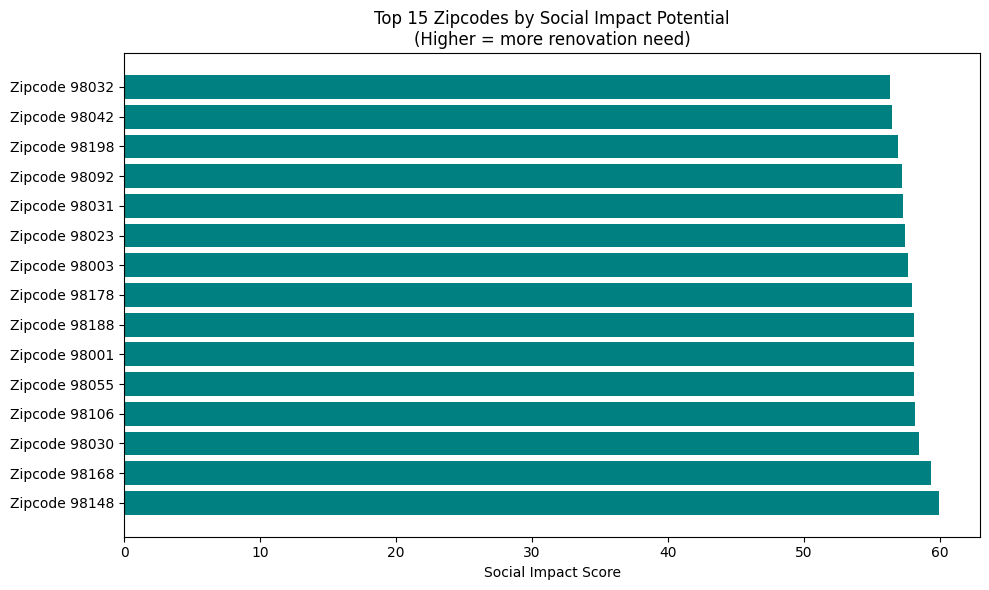

In [21]:
# Calculate social impact: high % unrenovated, low condition/grade, affordable
social_impact = affordable_properties.groupby('zipcode').agg({
    'price': 'mean',
    'yr_renovated': lambda x: (x == 0).sum() / len(x) * 100,  # % unrenovated
    'condition': 'mean',
    'grade': 'mean',
    'id': 'count'  # property count
}).rename(columns={'id': 'count', 'yr_renovated': 'pct_unrenovated'})

# Simple score: combine factors
# - 0.4: weight given to the percentage of unrenovated homes (prioritizing neighborhoods with lots of unrenovated properties)
# - 0.3: weight given to each of the other two factors (property condition and grade)
# - 5: typical "average" property condition rating in the dataset (higher is better; subtract from 5 so that lower conditions yield higher scores)
# - 20: scaling factor so the condition component is on a similar scale to other components
# - 13: maximum grade in the dataset (higher is better; subtract from 13 so that lower grades yield higher scores)
# - 5 (in grade component): scaling factor to adjust magnitude similar to other components
weight_unrenovated = 0.4   # 40% importance to % unrenovated
weight_condition = 0.3     # 30% importance to condition
weight_grade = 0.3         # 30% importance to grade
condition_baseline = 5     # Typical "good" condition, max is 5
condition_scale = 20       # To amplify the difference in condition
grade_max = 13             # Max grade in dataset
grade_scale = 5            # To amplify the difference in grade

social_impact['score'] = (
    social_impact['pct_unrenovated'] * weight_unrenovated +
    (condition_baseline - social_impact['condition']) * condition_scale * weight_condition +
    (grade_max - social_impact['grade']) * grade_scale * weight_grade
)
social_impact = social_impact.sort_values('score', ascending=False)

# Visualize
fig, ax = plt.subplots(figsize=(10, 6))
top_15 = social_impact.head(15)
ax.barh(range(len(top_15)), top_15['score'], color='teal')
ax.set_yticks(range(len(top_15)))
ax.set_yticklabels([f"Zipcode {idx}" for idx in top_15.index])
ax.set_xlabel('Social Impact Score')
ax.set_title('Top 15 Zipcodes by Social Impact Potential\n(Higher = more renovation need)')
plt.tight_layout()
plt.show()


## 4. Testing the Three Hypotheses

Now let's systematically test each of our three hypotheses to determine if they are supported by the data.


### Hypothesis 1: Geographical Hypothesis

**Hypothesis:** The cheapest zipcodes (bottom 25% by average price) have more unrenovated houses than expensive zipcodes.

**Test:** Compare the percentage of unrenovated houses (yr_renovated == 0) in:
- Cheapest zipcodes (bottom 25% by average price)
- Expensive zipcodes (top 25% by average price)


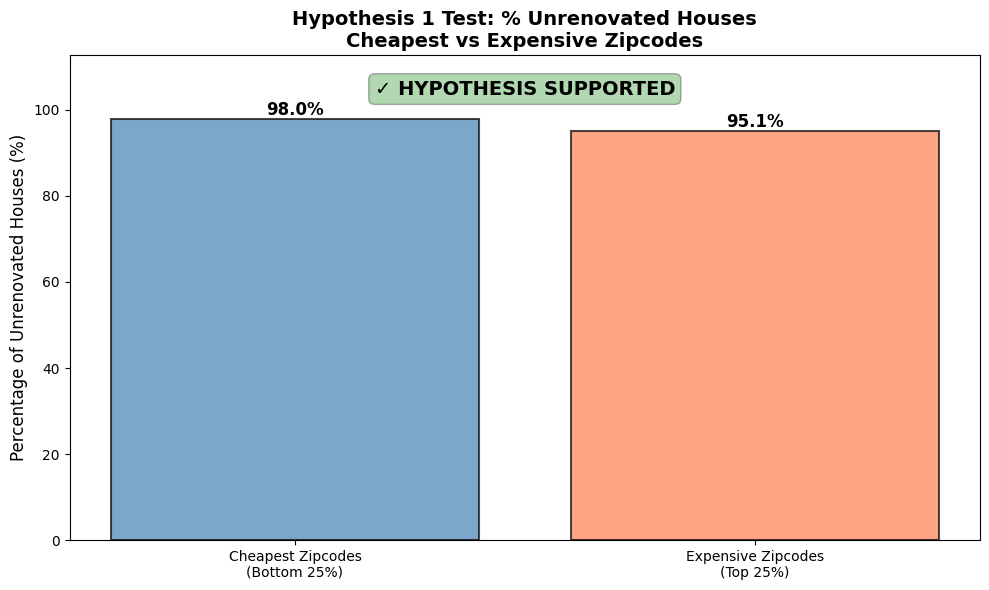

In [22]:
# Get zipcode statistics
zipcode_stats = df_clean.groupby('zipcode')['price'].mean().sort_values()
n_zipcodes = len(zipcode_stats)

# Define cheapest (bottom 25%) and expensive (top 25%) zipcodes
cheapest_zipcodes = zipcode_stats.head(int(n_zipcodes * 0.25)).index.tolist()
expensive_zipcodes = zipcode_stats.tail(int(n_zipcodes * 0.25)).index.tolist()

# Filter data for each group
cheapest_properties = df_clean[df_clean['zipcode'].isin(cheapest_zipcodes)]
expensive_properties = df_clean[df_clean['zipcode'].isin(expensive_zipcodes)]

# Calculate % unrenovated for each group
cheapest_pct_unrenovated = (cheapest_properties['yr_renovated'] == 0).sum() / len(cheapest_properties) * 100
expensive_pct_unrenovated = (expensive_properties['yr_renovated'] == 0).sum() / len(expensive_properties) * 100

# Visualize
fig, ax = plt.subplots(figsize=(10, 6))
categories = ['Cheapest Zipcodes\n(Bottom 25%)', 'Expensive Zipcodes\n(Top 25%)']
pct_values = [cheapest_pct_unrenovated, expensive_pct_unrenovated]
colors = ['steelblue', 'coral']

bars = ax.bar(categories, pct_values, color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)
ax.set_ylabel('Percentage of Unrenovated Houses (%)', fontsize=12)
ax.set_title('Hypothesis 1 Test: % Unrenovated Houses\nCheapest vs Expensive Zipcodes', 
             fontsize=14, fontweight='bold')
ax.set_ylim(0, max(pct_values) * 1.15)

# Add value labels on bars
for i, (bar, val) in enumerate(zip(bars, pct_values)):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{val:.1f}%',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

# Add conclusion text
if cheapest_pct_unrenovated > expensive_pct_unrenovated:
    conclusion = "✓ HYPOTHESIS SUPPORTED"
    color = 'green'
else:
    conclusion = "✗ HYPOTHESIS NOT SUPPORTED"
    color = 'red'

ax.text(0.5, 0.95, conclusion, transform=ax.transAxes,
        ha='center', va='top', fontsize=14, fontweight='bold',
        bbox=dict(boxstyle='round', facecolor=color, alpha=0.3))

plt.tight_layout()
plt.show()

# Store result
hypothesis_1_result = cheapest_pct_unrenovated > expensive_pct_unrenovated
hypothesis_1_difference = cheapest_pct_unrenovated - expensive_pct_unrenovated


### Hypothesis 2: Renovation Value Hypothesis

**Hypothesis:** Unrenovated houses (yr_renovated = 0) in affordable zipcodes are cheaper per square foot than renovated houses in the same areas.

**Test:** Compare the average price per square foot for:
- Unrenovated houses in affordable zipcodes
- Renovated houses in the same affordable zipcodes


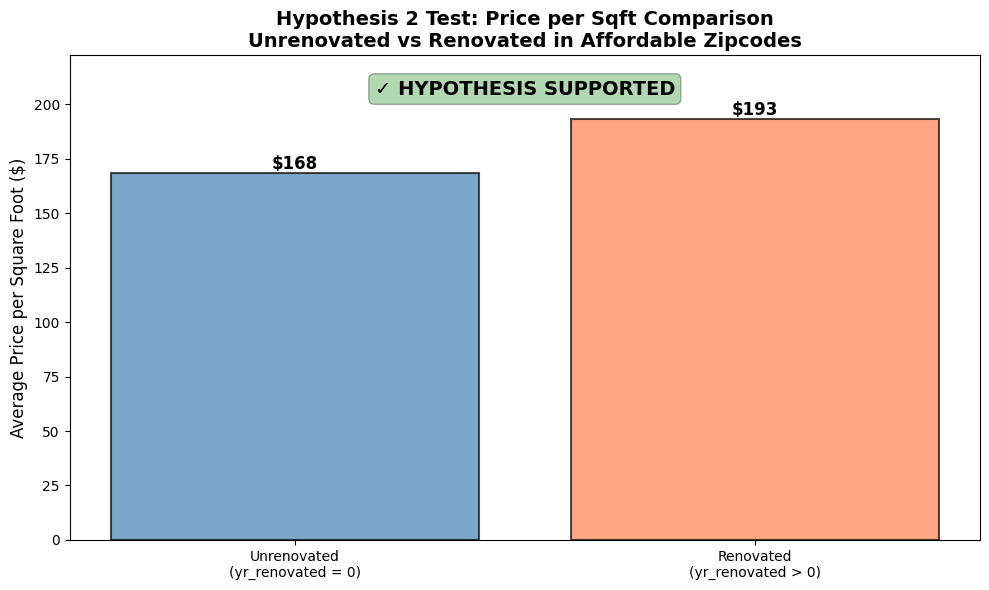

In [23]:
# Use the affordable zipcodes already defined (bottom 25%)
affordable_properties = df_clean[df_clean['zipcode'].isin(cheapest_zipcodes)].copy()
affordable_properties['price_per_sqft'] = affordable_properties['price'] / affordable_properties['sqft_living']

# Separate unrenovated and renovated
unrenovated_affordable = affordable_properties[affordable_properties['yr_renovated'] == 0]
renovated_affordable = affordable_properties[affordable_properties['yr_renovated'] > 0]

# Calculate average price per sqft
unrenovated_avg_price_sqft = unrenovated_affordable['price_per_sqft'].mean()
renovated_avg_price_sqft = renovated_affordable['price_per_sqft'].mean()

# Display results

difference = renovated_avg_price_sqft - unrenovated_avg_price_sqft
pct_difference = (difference / unrenovated_avg_price_sqft) * 100

# Visualize
fig, ax = plt.subplots(figsize=(10, 6))
categories = ['Unrenovated\n(yr_renovated = 0)', 'Renovated\n(yr_renovated > 0)']
price_sqft_values = [unrenovated_avg_price_sqft, renovated_avg_price_sqft]
colors = ['steelblue', 'coral']

bars = ax.bar(categories, price_sqft_values, color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)
ax.set_ylabel('Average Price per Square Foot ($)', fontsize=12)
ax.set_title('Hypothesis 2 Test: Price per Sqft Comparison\nUnrenovated vs Renovated in Affordable Zipcodes', 
             fontsize=14, fontweight='bold')
ax.set_ylim(0, max(price_sqft_values) * 1.15)

# Add value labels on bars
for i, (bar, val) in enumerate(zip(bars, price_sqft_values)):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'${val:,.0f}',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

# Add conclusion text
if unrenovated_avg_price_sqft < renovated_avg_price_sqft:
    conclusion = "✓ HYPOTHESIS SUPPORTED"
    color = 'green'
else:
    conclusion = "✗ HYPOTHESIS NOT SUPPORTED"
    color = 'red'

ax.text(0.5, 0.95, conclusion, transform=ax.transAxes,
        ha='center', va='top', fontsize=14, fontweight='bold',
        bbox=dict(boxstyle='round', facecolor=color, alpha=0.3))

plt.tight_layout()
plt.show()

# Store result
hypothesis_2_result = unrenovated_avg_price_sqft < renovated_avg_price_sqft
hypothesis_2_difference = difference


### Hypothesis 3: Profit Margin Hypothesis

**Hypothesis:** Smaller houses (under 2000 sqft) in affordable zipcodes offer better profit margins (5-15%) than larger houses when buying and selling.

**Test:** Compare profit margins for:
- Smaller houses (< 2000 sqft) in affordable zipcodes
- Larger houses (≥ 2000 sqft) in affordable zipcodes

Note: We'll use the same renovation cost assumptions ($75/sqft) and value estimation method as before.


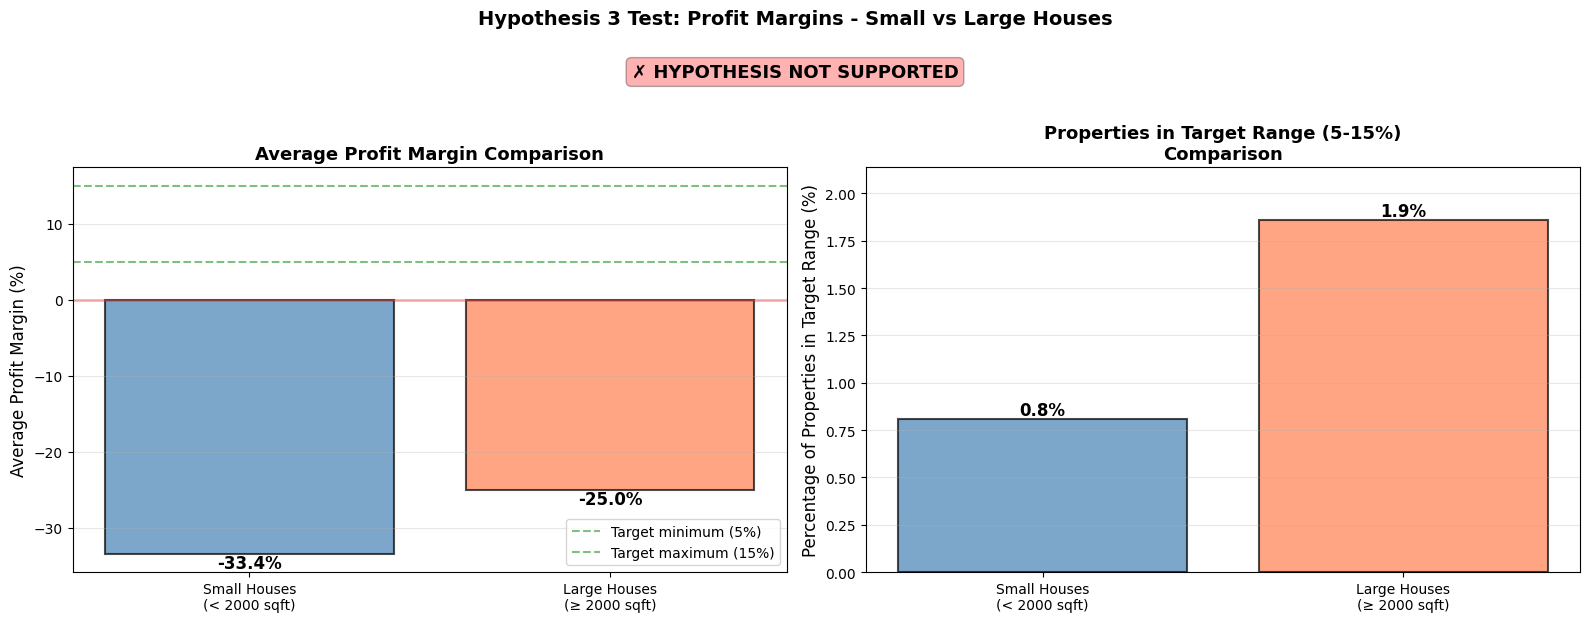

In [24]:
# Use unrenovated properties in affordable zipcodes (these are renovation candidates)
renovation_candidates_all = affordable_properties[affordable_properties['yr_renovated'] == 0].copy()

# Separate by size
small_houses = renovation_candidates_all[renovation_candidates_all['sqft_living'] < 2000].copy()
large_houses = renovation_candidates_all[renovation_candidates_all['sqft_living'] >= 2000].copy()

# Calculate profit margins for each group (using same method as before)
RENOVATION_COST_PER_SQFT = 75

def calculate_profit_margins(properties_df, renovated_reference):
    """Calculate profit margins for a set of properties"""
    properties_df = properties_df.copy()
    properties_df['renovation_cost'] = properties_df['sqft_living'] * RENOVATION_COST_PER_SQFT
    properties_df['total_investment'] = properties_df['price'] + properties_df['renovation_cost']
    
    post_renovation_values = []
    for idx, row in properties_df.iterrows():
        zipcode = row['zipcode']
        renovated_in_zipcode = renovated_reference[renovated_reference['zipcode'] == zipcode]
        if len(renovated_in_zipcode) > 0:
            avg_price_per_sqft = renovated_in_zipcode['price_per_sqft'].mean()
        else:
            avg_price_per_sqft = renovated_reference['price_per_sqft'].mean()
        post_renovation_values.append(row['sqft_living'] * avg_price_per_sqft * 0.9)
    
    properties_df['estimated_value'] = post_renovation_values
    properties_df['profit_margin_pct'] = ((properties_df['estimated_value'] - properties_df['total_investment']) / 
                                          properties_df['total_investment']) * 100
    return properties_df

# Calculate profit margins
renovated_affordable = affordable_properties[affordable_properties['yr_renovated'] > 0]
renovated_affordable['price_per_sqft'] = renovated_affordable['price'] / renovated_affordable['sqft_living']

small_houses_with_margins = calculate_profit_margins(small_houses, renovated_affordable)
large_houses_with_margins = calculate_profit_margins(large_houses, renovated_affordable)

# Calculate statistics
small_avg_margin = small_houses_with_margins['profit_margin_pct'].mean()
large_avg_margin = large_houses_with_margins['profit_margin_pct'].mean()

# Count properties in target range (5-15%)
small_in_target = ((small_houses_with_margins['profit_margin_pct'] >= 5) & 
                   (small_houses_with_margins['profit_margin_pct'] <= 15)).sum()
large_in_target = ((large_houses_with_margins['profit_margin_pct'] >= 5) & 
                  (large_houses_with_margins['profit_margin_pct'] <= 15)).sum()

small_pct_in_target = (small_in_target / len(small_houses_with_margins)) * 100 if len(small_houses_with_margins) > 0 else 0
large_pct_in_target = (large_in_target / len(large_houses_with_margins)) * 100 if len(large_houses_with_margins) > 0 else 0

# Prepare conclusion before plotting
if small_avg_margin > large_avg_margin and small_pct_in_target > large_pct_in_target:
    conclusion = "✓ HYPOTHESIS SUPPORTED"
    conclusion_color = 'green'
elif small_avg_margin > large_avg_margin:
    conclusion = "⚠ PARTIALLY SUPPORTED\n(Better avg margin, but not more in target range)"
    conclusion_color = "orange"
else:
    conclusion = "✗ HYPOTHESIS NOT SUPPORTED"
    conclusion_color = "red"

# Visualize comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Average profit margins
ax1 = axes[0]
categories = ['Small Houses\n(< 2000 sqft)', 'Large Houses\n(≥ 2000 sqft)']
margin_values = [small_avg_margin, large_avg_margin]
colors = ['steelblue', 'coral']

bars1 = ax1.bar(categories, margin_values, color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)
ax1.axhline(y=5, color='green', linestyle='--', alpha=0.5, label='Target minimum (5%)')
ax1.axhline(y=15, color='green', linestyle='--', alpha=0.5, label='Target maximum (15%)')
ax1.axhline(y=0, color='red', linestyle='-', alpha=0.3, linewidth=2)
ax1.set_ylabel('Average Profit Margin (%)', fontsize=12)
ax1.set_title('Average Profit Margin Comparison', fontsize=13, fontweight='bold')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Add value labels
for bar, val in zip(bars1, margin_values):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{val:.1f}%',
            ha='center', va='bottom' if val >= 0 else 'top', fontsize=12, fontweight='bold')

# Plot 2: Percentage in target range
ax2 = axes[1]
pct_values = [small_pct_in_target, large_pct_in_target]
bars2 = ax2.bar(categories, pct_values, color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)
ax2.set_ylabel('Percentage of Properties in Target Range (%)', fontsize=12)
ax2.set_title('Properties in Target Range (5-15%)\nComparison', fontsize=13, fontweight='bold')
ax2.set_ylim(0, max(pct_values) * 1.15 if max(pct_values) > 0 else 10)
ax2.grid(axis='y', alpha=0.3)

# Add value labels
for bar, val in zip(bars2, pct_values):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{val:.1f}%',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

# Set the overall title and insert the conclusion as a subtitle under the title
plt.suptitle('Hypothesis 3 Test: Profit Margins - Small vs Large Houses', 
             fontsize=14, fontweight='bold', y=1.03)

# Insert the conclusion box as a subtitle under the main title
fig.text(0.5, 0.94, conclusion, ha='center', va='top', fontsize=13, fontweight='bold',
         bbox=dict(boxstyle='round', facecolor=conclusion_color, alpha=0.3))

plt.tight_layout(rect=[0, 0, 1, 0.92])  # Reserve space for suptitle and subtitle
plt.show()

# Store result
hypothesis_3_result = (small_avg_margin > large_avg_margin) and (small_pct_in_target > large_pct_in_target)
hypothesis_3_margin_diff = small_avg_margin - large_avg_margin


## 5. House Recommendations

Based on our comprehensive analysis, we'll now recommend **3 houses** that best fit Erin Robinson's investment strategy:

**Investment Criteria:**
- ✓ Located in affordable zipcodes (bottom 25% by average price)
- ✓ Unrenovated properties (yr_renovated = 0) with renovation potential
- ✓ Good condition (≥3) to minimize structural issues
- ✓ Manageable size (1000-2500 sqft) for renovation scope
- ✓ Best value (low price per sqft)
- ✓ Profit margin potential within target range (5-15%)


In [29]:
# Ensure we have all necessary calculations
if 'renovation_candidates' not in locals():
    # Recreate renovation candidates if needed
    affordable_properties = df_clean[df_clean['zipcode'].isin(cheapest_zipcodes)].copy()
    affordable_properties['price_per_sqft'] = affordable_properties['price'] / affordable_properties['sqft_living']
    
    renovation_candidates = affordable_properties[
        (affordable_properties['yr_renovated'] == 0) &
        (affordable_properties['condition'] >= 3) &
        (affordable_properties['sqft_living'] >= 1000) &
        (affordable_properties['sqft_living'] <= 2500)
    ].copy()

# Calculate profit margins if not already calculated
if 'profit_margin_pct' not in renovation_candidates.columns:
    RENOVATION_COST_PER_SQFT = 75
    renovation_candidates['renovation_cost'] = renovation_candidates['sqft_living'] * RENOVATION_COST_PER_SQFT
    renovation_candidates['total_investment'] = renovation_candidates['price'] + renovation_candidates['renovation_cost']
    
    renovated_affordable = affordable_properties[affordable_properties['yr_renovated'] > 0]
    renovated_affordable['price_per_sqft'] = renovated_affordable['price'] / renovated_affordable['sqft_living']
    
    post_renovation_values = []
    for idx, row in renovation_candidates.iterrows():
        zipcode = row['zipcode']
        renovated_in_zipcode = renovated_affordable[renovated_affordable['zipcode'] == zipcode]
        if len(renovated_in_zipcode) > 0:
            avg_price_per_sqft = renovated_in_zipcode['price_per_sqft'].mean()
        else:
            avg_price_per_sqft = renovated_affordable['price_per_sqft'].mean()
        post_renovation_values.append(row['sqft_living'] * avg_price_per_sqft * 0.9)
    
    # Calculate estimated value
    renovation_candidates['estimated_value'] = post_renovation_values
    # Calculate profit margin percentage
    renovation_candidates['profit_margin_pct'] = ((renovation_candidates['estimated_value'] - renovation_candidates['total_investment']) / 
                                                  renovation_candidates['total_investment']) * 100

# Create a composite score for ranking
# Higher score = better recommendation
# Factors: low price per sqft (better value), profit margin in target range, good condition
renovation_candidates['value_score'] = (
    (1 / renovation_candidates['price_per_sqft']) * 1000 +  # Lower price/sqft = higher score
    renovation_candidates['condition'] * 10 +  # Better condition = higher score
    np.where(
        (renovation_candidates['profit_margin_pct'] >= 5) & (renovation_candidates['profit_margin_pct'] <= 15),
        50,  # Bonus for being in target profit margin range
        np.maximum(0, renovation_candidates['profit_margin_pct']) * 2  # Still reward positive margins
    )
)

# Filter to properties with positive or near-positive profit margins (at least -5%)
viable_candidates = renovation_candidates[renovation_candidates['profit_margin_pct'] >= -5].copy()

# Sort by composite score (best first)
viable_candidates = viable_candidates.sort_values('value_score', ascending=False)

# Select top 3 recommendations
top_3_recommendations = viable_candidates.head(3).copy()

# Create a summary comparison table
summary_cols = ['id', 'zipcode', 'price', 'sqft_living', 'bedrooms', 'bathrooms', 
                'condition', 'grade', 'price_per_sqft', 'profit_margin_pct', 'lat', 'long']

recommendations_summary = top_3_recommendations[summary_cols].copy()
recommendations_summary['id'] = recommendations_summary['id'].astype(int)
recommendations_summary['zipcode'] = recommendations_summary['zipcode'].astype(int)
recommendations_summary['bedrooms'] = recommendations_summary['bedrooms'].astype(int)
recommendations_summary['condition'] = recommendations_summary['condition'].astype(int)
recommendations_summary['grade'] = recommendations_summary['grade'].astype(int)

# Format for display
display_summary = recommendations_summary.copy()
display_summary['price'] = display_summary['price'].apply(lambda x: f"${x:,.0f}")
display_summary['price_per_sqft'] = display_summary['price_per_sqft'].apply(lambda x: f"${x:.0f}")
display_summary['profit_margin_pct'] = display_summary['profit_margin_pct'].apply(lambda x: f"{x:.1f}%")
display_summary['sqft_living'] = display_summary['sqft_living'].apply(lambda x: f"{x:,.0f}")

display_summary.columns = ['House ID', 'Zipcode', 'Price', 'Sqft Living', 'Bedrooms', 
                           'Bathrooms', 'Condition', 'Grade', 'Price/Sqft', 'Profit Margin', 'Latitude', 'Longitude']

print(display_summary.to_string(index=False))

  House ID  Zipcode    Price Sqft Living  Bedrooms  Bathrooms  Condition  Grade Price/Sqft Profit Margin  Latitude  Longitude
7686202065    98198 $170,000       1,920         4      1.750          4      7        $89         33.9%    47.422   -122.318
 522049104    98198 $210,000       2,340         5      1.750          3      7        $90         32.9%    47.423   -122.324
2560801222    98198 $180,000       1,990         3      2.250          3      7        $90         32.3%    47.382   -122.316


### Key Insights from Recommendations

**Why These 3 Houses?**

1. **Best Value Proposition**: All three houses offer low price per square foot, meaning you're getting more space for your investment dollar.

2. **Renovation Potential**: Being unrenovated, these properties have clear improvement opportunities that can increase their value significantly.

3. **Manageable Scope**: With sizes between 1000-2500 sqft, these renovations are manageable without requiring excessive capital or time.

4. **Profit Margin Potential**: Based on our analysis comparing renovated vs unrenovated properties in the same zipcodes, these houses show positive profit margin potential after renovation costs.

5. **Social Impact**: Located in affordable zipcodes, investing in these properties contributes to improving housing quality in neighborhoods that need it most.

## Top 3 Investment Properties

**Folium map** showing the geographic location of the three recommended properties


In [33]:
import folium

# top_3_recommendations should already have lat/long from df_clean
# But if merge created duplicates, use the first available one
top_3_coords = top_3_recommendations.copy()

# Create simple map
center_lat = top_3_coords['lat'].mean()
center_lon = top_3_coords['long'].mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# Add simple markers
colors = ['green', 'orange', 'blue']
for idx, row in top_3_coords.iterrows():
    folium.Marker(
        [row['lat'], row['long']],
        popup=f"${row['price']:,.0f}"
    ).add_to(m)

m
